# GETTING STARTED WITH BUILDING A MODEL FOR FETAL HEALTH BY TAKING VARIOUS NUMERIC INPUTS

Calling of Basic libraries and Dataset

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib

In [2]:
from urllib.request import urlretrieve

In [3]:
location="https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification/download?datasetVersionNumber=1"

In [4]:
urlretrieve(location,'datasetfetal.csv')

('datasetfetal.csv', <http.client.HTTPMessage at 0x24b9d25ca50>)

In [5]:
dataset=pd.read_csv('C:\\Users\\Harsh Kumar Sharma\\OneDrive\\Desktop\\fetal_health.csv')

 # Description of  all the Medical Terms
 
 Baseline Value: The baseline fetal heart rate (FHR) is the average heart rate of the fetus over a defined period of time, typically measured in beats per minute (bpm). It serves as a reference point for assessing changes and patterns in the fetal heart rate.

Accelerations: Accelerations are temporary increases in the fetal heart rate above the baseline value. They are often associated with fetal movement and can indicate fetal well-being.

Fetal Movement: This refers to the movement of the fetus within the uterus. Monitoring fetal movement is important for assessing fetal well-being and responsiveness.

Uterine Contractions: Uterine contractions are the rhythmic tightening and relaxing of the muscles of the uterus during labor. Monitoring uterine contractions helps assess the progress of labor and its effect on fetal well-being.

Light Decelerations: Light decelerations are temporary decreases in the fetal heart rate that are typically transient and not associated with fetal distress.

Severe Decelerations: Severe decelerations are significant and prolonged decreases in the fetal heart rate that may indicate fetal distress or compromise.

Prolonged Decelerations: Prolonged decelerations are decelerations in the fetal heart rate that last for an extended period and may require intervention.

Abnormal Short-term Variability: Short-term variability refers to fluctuations in the fetal heart rate that occur over short time intervals. Abnormal short-term variability may indicate fetal distress.

Mean Value of Short-term Variability: This is the average magnitude of short-term variability in the fetal heart rate signal.

Percentage of Time with Abnormal Long-term Variability: Long-term variability refers to slower fluctuations in the fetal heart rate over longer time intervals. Abnormal long-term variability may indicate fetal distress.

Histogram Min/Max/Number of Peaks/Number of Zeroes/Mode/Mean/Median/Variance/Tendency: These are various statistical measures derived from the histogram analysis of the fetal heart rate signal. They provide information about the distribution, shape, and characteristics of the fetal heart rate data.

Fetal Health: Fetal health refers to the overall well-being and condition of the fetus. It is assessed based on various factors, including the fetal heart rate, uterine contractions, fetal movements, and other parameters monitored during pregnancy and labor.

In [6]:
dataset

baseline value  accelerations  fetal_movement  uterine_contractions  \
0              120.0          0.000           0.000                 0.000   
1              132.0          0.006           0.000                 0.006   
2              133.0          0.003           0.000                 0.008   
3              134.0          0.003           0.000                 0.008   
4              132.0          0.007           0.000                 0.008   
...              ...            ...             ...                   ...   
2121           140.0          0.000           0.000                 0.007   
2122           140.0          0.001           0.000                 0.007   
2123           140.0          0.001           0.000                 0.007   
2124           140.0          0.001           0.000                 0.006   
2125           142.0          0.002           0.002                 0.008   

      light_decelerations  severe_decelerations  prolongued_decelerations  \
0                   0.000                   0.0                       0.0   
1                   0.003                   0.0                       0.0   
2                   0.003                   0.0                       0.0   
3                   0.003                   0.0                       0.0   
4                   0.000                   0.0                       0.0   
...                   ...                   ...                       ...   
2121                0.000                   0.0                       0.0   
2122                0.000                   0.0                       0.0   
2123                0.000                   0.0                       0.0   
2124                0.000                   0.0                       0.0   
2125                0.000                   0.0                       0.0   

      abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                                73.0                                   0.5   
1                                17.0                                   2.1   
2                                16.0                                   2.1   
3                                16.0                                   2.4   
4                                16.0                                   2.4   
...                               ...                                   ...   
2121                             79.0                                   0.2   
2122                             78.0                                   0.4   
2123                             79.0                                   0.4   
2124                             78.0                                   0.4   
2125                             74.0                                   0.4   

      percentage_of_time_with_abnormal_long_term_variability  ...  \
0                                                  43.0       ...   
1                                                   0.0       ...   
2                                                   0.0       ...   
3                                                   0.0       ...   
4                                                   0.0       ...   
...                                                 ...       ...   
2121                                               25.0       ...   
2122                                               22.0       ...   
2123                                               20.0       ...   
2124                                               27.0       ...   
2125                                               36.0       ...   

      histogram_min  histogram_max  histogram_number_of_peaks  \
0              62.0          126.0                        2.0   
1              68.0          198.0                        6.0   
2              68.0          198.0                        5.0   
3              53.0          170.0                       11.0   
4              53.0          170.0                   

Description about the Dataset and Information about Dataset

In [7]:
import seaborn as sns

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [9]:
dataset.describe()

baseline value  accelerations  fetal_movement  uterine_contractions  \
count     2126.000000    2126.000000     2126.000000           2126.000000   
mean       133.303857       0.003178        0.009481              0.004366   
std          9.840844       0.003866        0.046666              0.002946   
min        106.000000       0.000000        0.000000              0.000000   
25%        126.000000       0.000000        0.000000              0.002000   
50%        133.000000       0.002000        0.000000              0.004000   
75%        140.000000       0.006000        0.003000              0.007000   
max        160.000000       0.019000        0.481000              0.015000   

       light_decelerations  severe_decelerations  prolongued_decelerations  \
count          2126.000000           2126.000000               2126.000000   
mean              0.001889              0.000003                  0.000159   
std               0.002960              0.000057                  0.000590   
min               0.000000              0.000000                  0.000000   
25%               0.000000              0.000000                  0.000000   
50%               0.000000              0.000000                  0.000000   
75%               0.003000              0.000000                  0.000000   
max               0.015000              0.001000                  0.005000   

       abnormal_short_term_variability  mean_value_of_short_term_variability  \
count                      2126.000000                           2126.000000   
mean                         46.990122                              1.332785   
std                          17.192814                              0.883241   
min                          12.000000                              0.200000   
25%                          32.000000                              0.700000   
50%                          49.000000                              1.200000   
75%                          61.000000                              1.700000   
max                          87.000000                              7.000000   

       percentage_of_time_with_abnormal_long_term_variability  ...  \
count                                         2126.00000       ...   
mean                                             9.84666       ...   
std                                             18.39688       ...   
min                                              0.00000       ...   
25%                                              0.00000       ...   
50%                                              0.00000       ...   
75%                                             11.00000       ...   
max                                             91.00000       ...   

       histogram_min  histogram_max  histogram_number_of_peaks  \
count    2126.000000    2126.000000                2126.000000   
mean       93.579492     164.025400                   4.068203   
std        29.560212      17.944183                   2.949386   
min        50.000000     122.000000                   0.000000   
25%        67.000000     152.000000                   2.000000   
50%        93.000000     162.000000                   3.000000   
75%       120.000000     174.000000                   6.000000   
max       159.000000     238.000000                  18.000000   

       histogram_number_of_zeroes  histogram_mode  histogram_mean  \
count                 2126.000000     2126.000000     2126.000000   
mean                     0.323612      137.452023      134.610536   
std                      0.706059       16.381289       15.593596   
min                      0.000000       60.000000       73.000000   
25%                      0.000000      129.000000      125.000000   
50%                      0.000000      139.000000      136.000000   
75%                      0.000000      148.000000      145.000000   
max                     10.000000      187.000000      182.000000   

       histogram_median  histogr

In [10]:
dataset.shape

(2126, 22)

In [11]:
import plotly.express as px

In [12]:
import matplotlib 
sns.set_style('darkgrid')
matplotlib.rcParams['font.size']=16
matplotlib.rcParams['figure.figsize']=(20,10)
matplotlib.rcParams['figure.facecolor']='#00000000'

# HISTOGRAM DIAGRAMS

Histogram Diagrams of all Medical Terms


In [13]:
fig=px.histogram(dataset,x='baseline value',marginal='box',nbins=47,title='Distribution of Baseline')
fig.update_layout(bargap=0.1)
fig.show()

In [14]:
fig=px.histogram(dataset,x='accelerations',marginal='box',nbins=47,title='Distribution of Acceraltions')
fig.update_layout(bargap=0.1)
fig.show()

In [15]:
fig=px.histogram(dataset,x='fetal_movement',marginal='box',nbins=47,title='Distribution of Fetal movement')
fig.update_layout(bargap=0.1)
fig.show()

In [16]:
fig=px.histogram(dataset,x='uterine_contractions',marginal='box',nbins=47,title='Distribution of uterine contractions')
fig.update_layout(bargap=0.1)
fig.show()

In [17]:
fig=px.histogram(dataset,x='light_decelerations',marginal='box',nbins=47,title='Distribution of light decelerations')
fig.update_layout(bargap=0.1)
fig.show()

In [18]:
fig=px.histogram(dataset,x='prolongued_decelerations',marginal='box',nbins=47,title='Distribution of prolongued decelerations')
fig.update_layout(bargap=0.1)
fig.show()

In [19]:
fig=px.histogram(dataset,x='severe_decelerations',marginal='box',nbins=47,title='Distribution of severe decelerations')
fig.update_layout(bargap=0.1)
fig.show()

array([[<Axes: title={'center': 'baseline value'}>,
        <Axes: title={'center': 'accelerations'}>,
        <Axes: title={'center': 'fetal_movement'}>,
        <Axes: title={'center': 'uterine_contractions'}>,
        <Axes: title={'center': 'light_decelerations'}>],
       [<Axes: title={'center': 'severe_decelerations'}>,
        <Axes: title={'center': 'prolongued_decelerations'}>,
        <Axes: title={'center': 'abnormal_short_term_variability'}>,
        <Axes: title={'center': 'mean_value_of_short_term_variability'}>,
        <Axes: title={'center': 'percentage_of_time_with_abnormal_long_term_variability'}>],
       [<Axes: title={'center': 'mean_value_of_long_term_variability'}>,
        <Axes: title={'center': 'histogram_width'}>,
        <Axes: title={'center': 'histogram_min'}>,
        <Axes: title={'center': 'histogram_max'}>,
        <Axes: title={'center': 'histogram_number_of_peaks'}>],
       [<Axes: title={'center': 'histogram_number_of_zeroes'}>,
        <Axes: ti

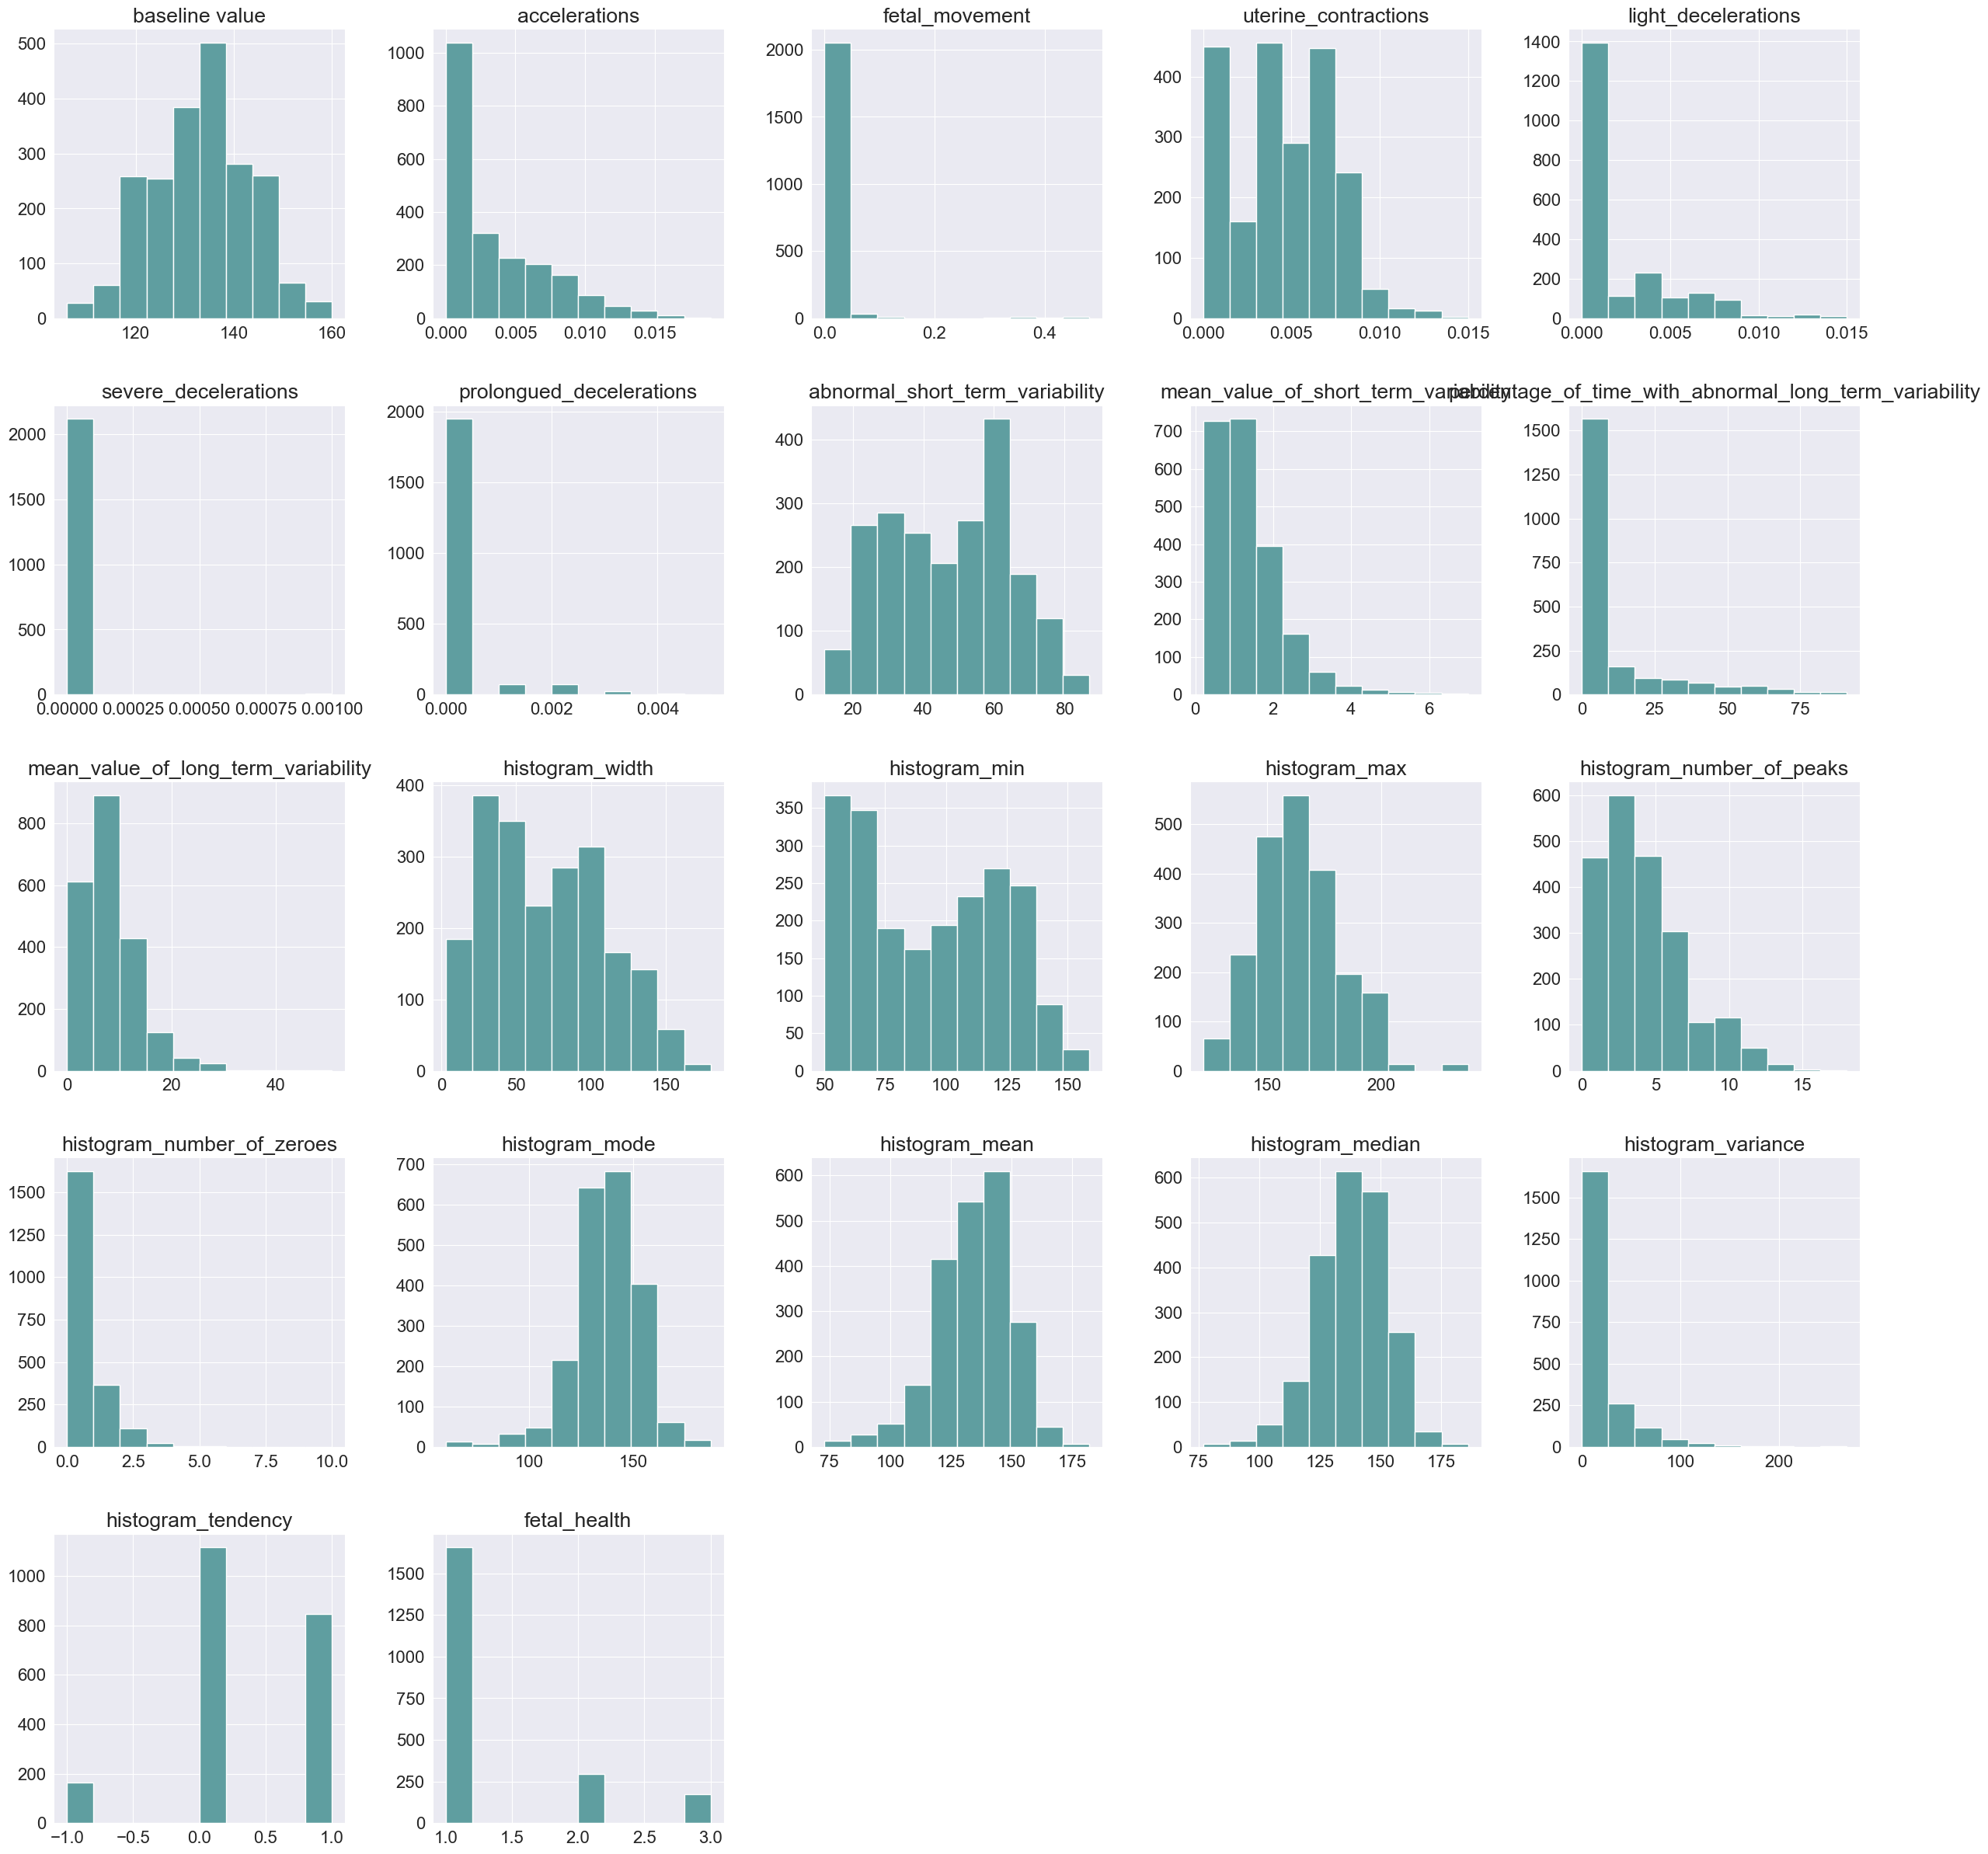

In [20]:
dataset.hist(figsize=(30,30),color='#5F9EA0')


# CORRELATION MATRIX

A correlation matrix is a tabular representation that illustrates the relationships between variables in a dataset. Each cell in the matrix shows the correlation coefficient, ranging from -1 to 1, indicating the strength and direction of the linear relationship between two variables. Common uses include identifying redundant features, detecting multicollinearity, exploring data patterns, guiding feature engineering, aiding model interpretation, and assisting in anomaly detection.

Here we have used Correlation matrix diagram to represent the strength of two diffrent medical terms which helps to determine the health of fetus




Text(0.5, 1.0, 'Correlation Matrix')

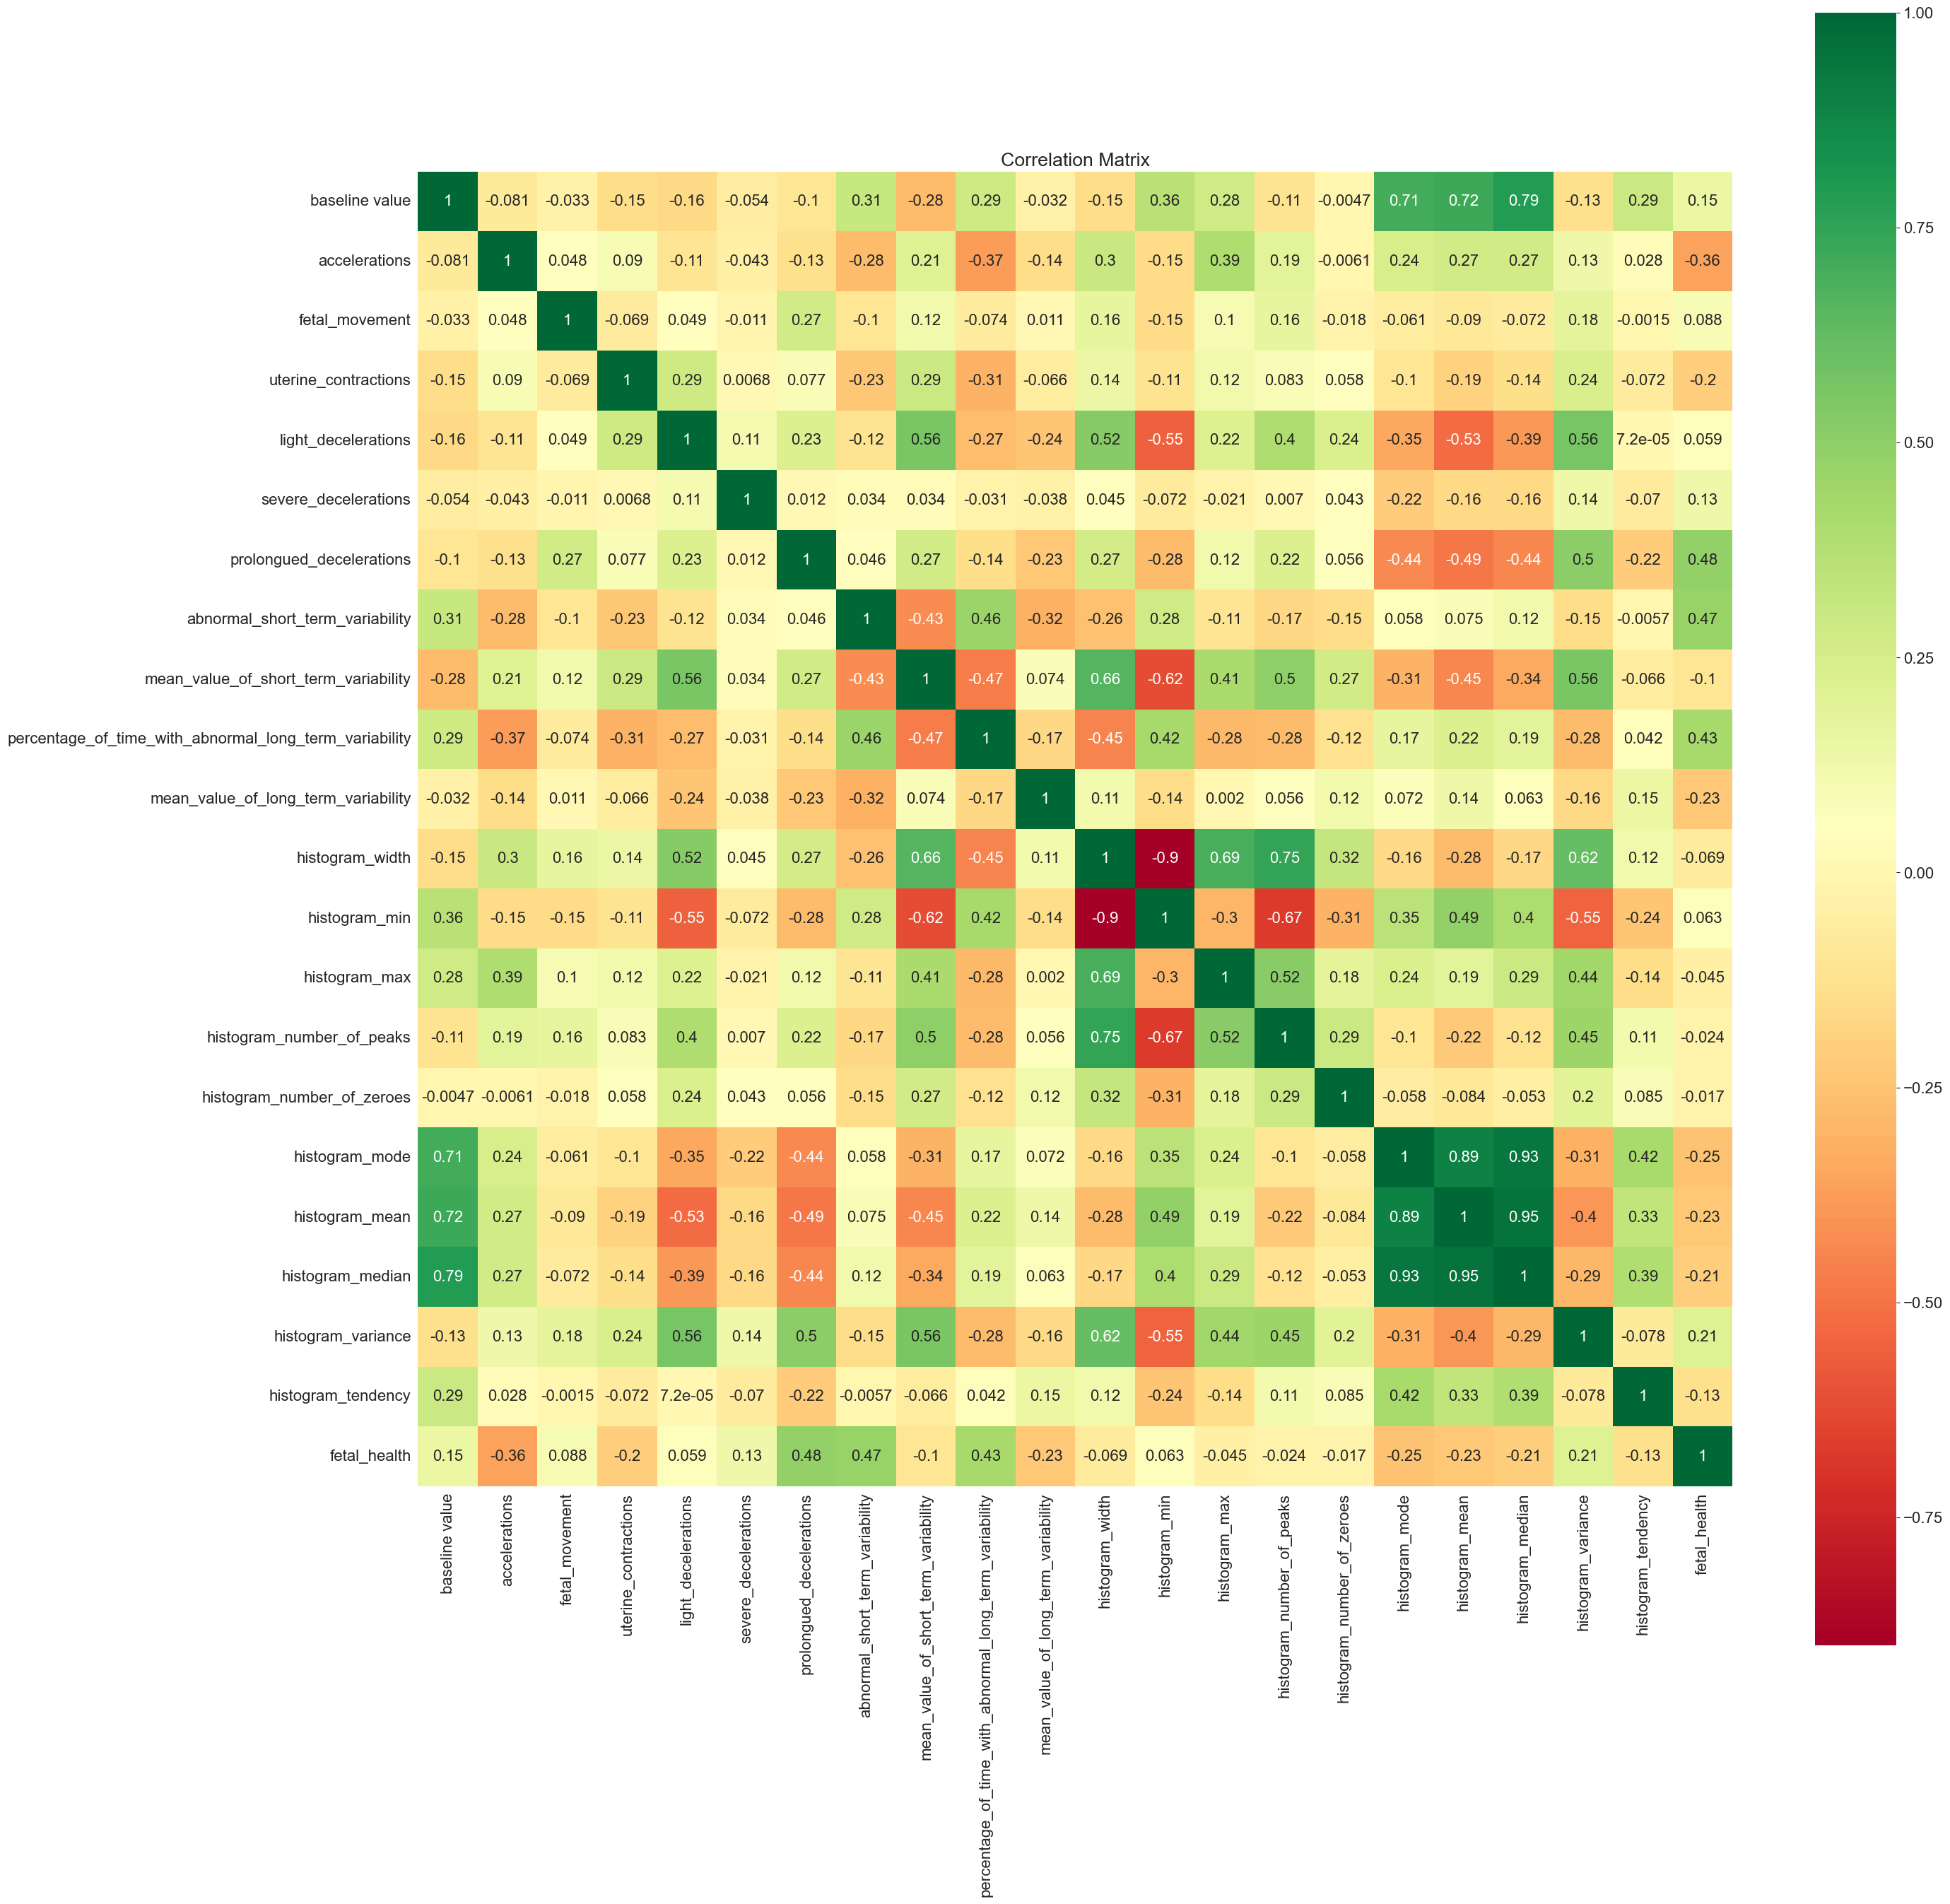

In [21]:
plt.figure(figsize=(30,30))
sns.heatmap(dataset.corr(),annot=True,cmap='RdYlGn',square=True)
plt.title("Correlation Matrix")

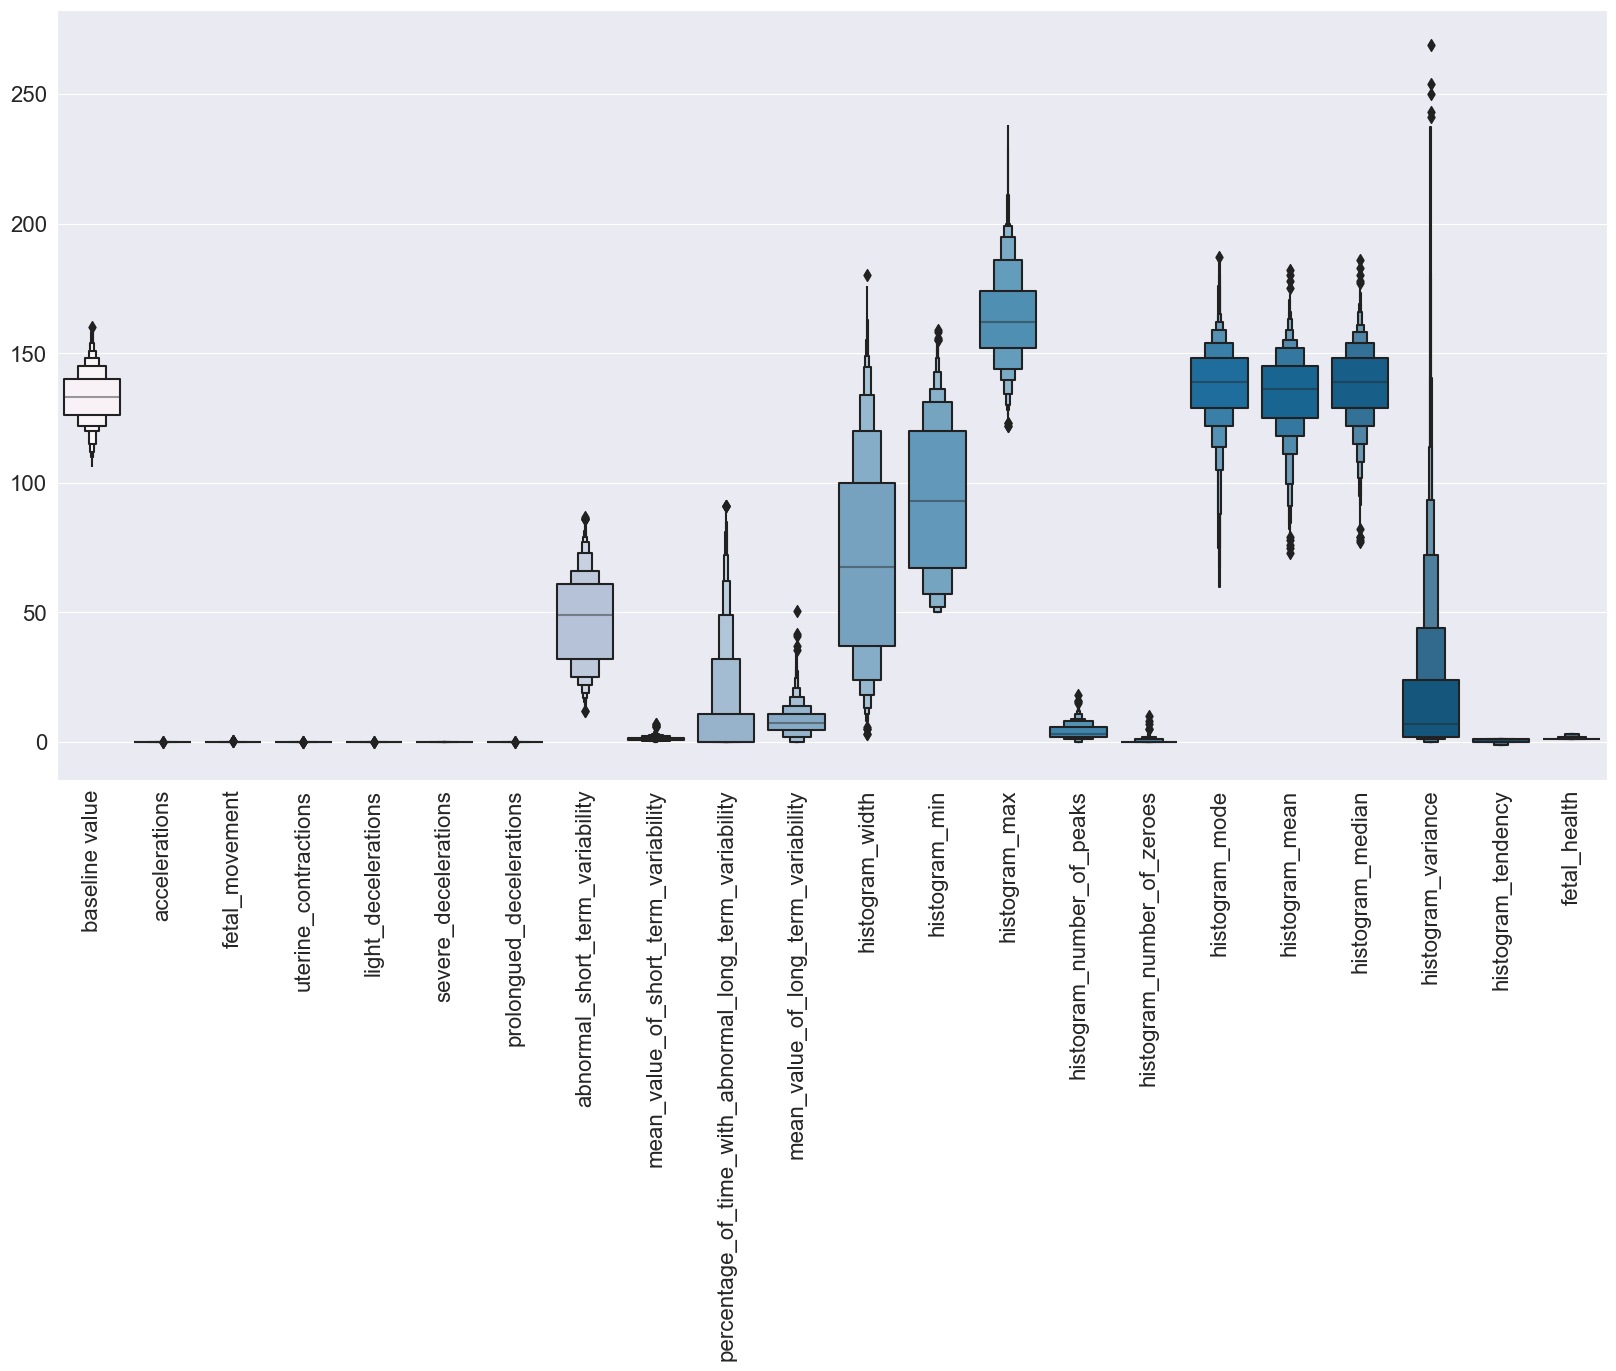

In [22]:
plt.figure(figsize=(20,10))
sns.boxenplot(data=dataset,palette='PuBu')
plt.xticks(rotation=90)
plt.show()

In [23]:
from scipy import stats
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score,f1_score

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
X=dataset.drop("fetal_health",axis=1).values
Y=dataset["fetal_health"].values

In [25]:
s_scaler=preprocessing.StandardScaler()
X_scaled =s_scaler.fit_transform(X)

In [26]:
col_names=dataset.drop("fetal_health",axis=1).columns.tolist()
X=pd.DataFrame(X_scaled,columns=col_names)
X.describe().T[['min','mean','std','25%','50%','75%','max']].style.background_gradient(axis=1)

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=42)

In [28]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(C=100)
print(lr.fit(X_train.values,Y_train))
print(lr.score(X_train.values,Y_train))
print(lr.score(X_test.values,Y_test))

LogisticRegression(C=100)
0.9079301075268817
0.8746081504702194


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [29]:
Y_pred=lr.predict(X_test)
df=pd.DataFrame({'Actual': Y_test,'Predicted': Y_pred})
df.head(7)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names



Actual  Predicted
0     1.0        1.0
1     1.0        1.0
2     1.0        1.0
3     1.0        1.0
4     1.0        1.0
5     3.0        3.0
6     1.0        1.0

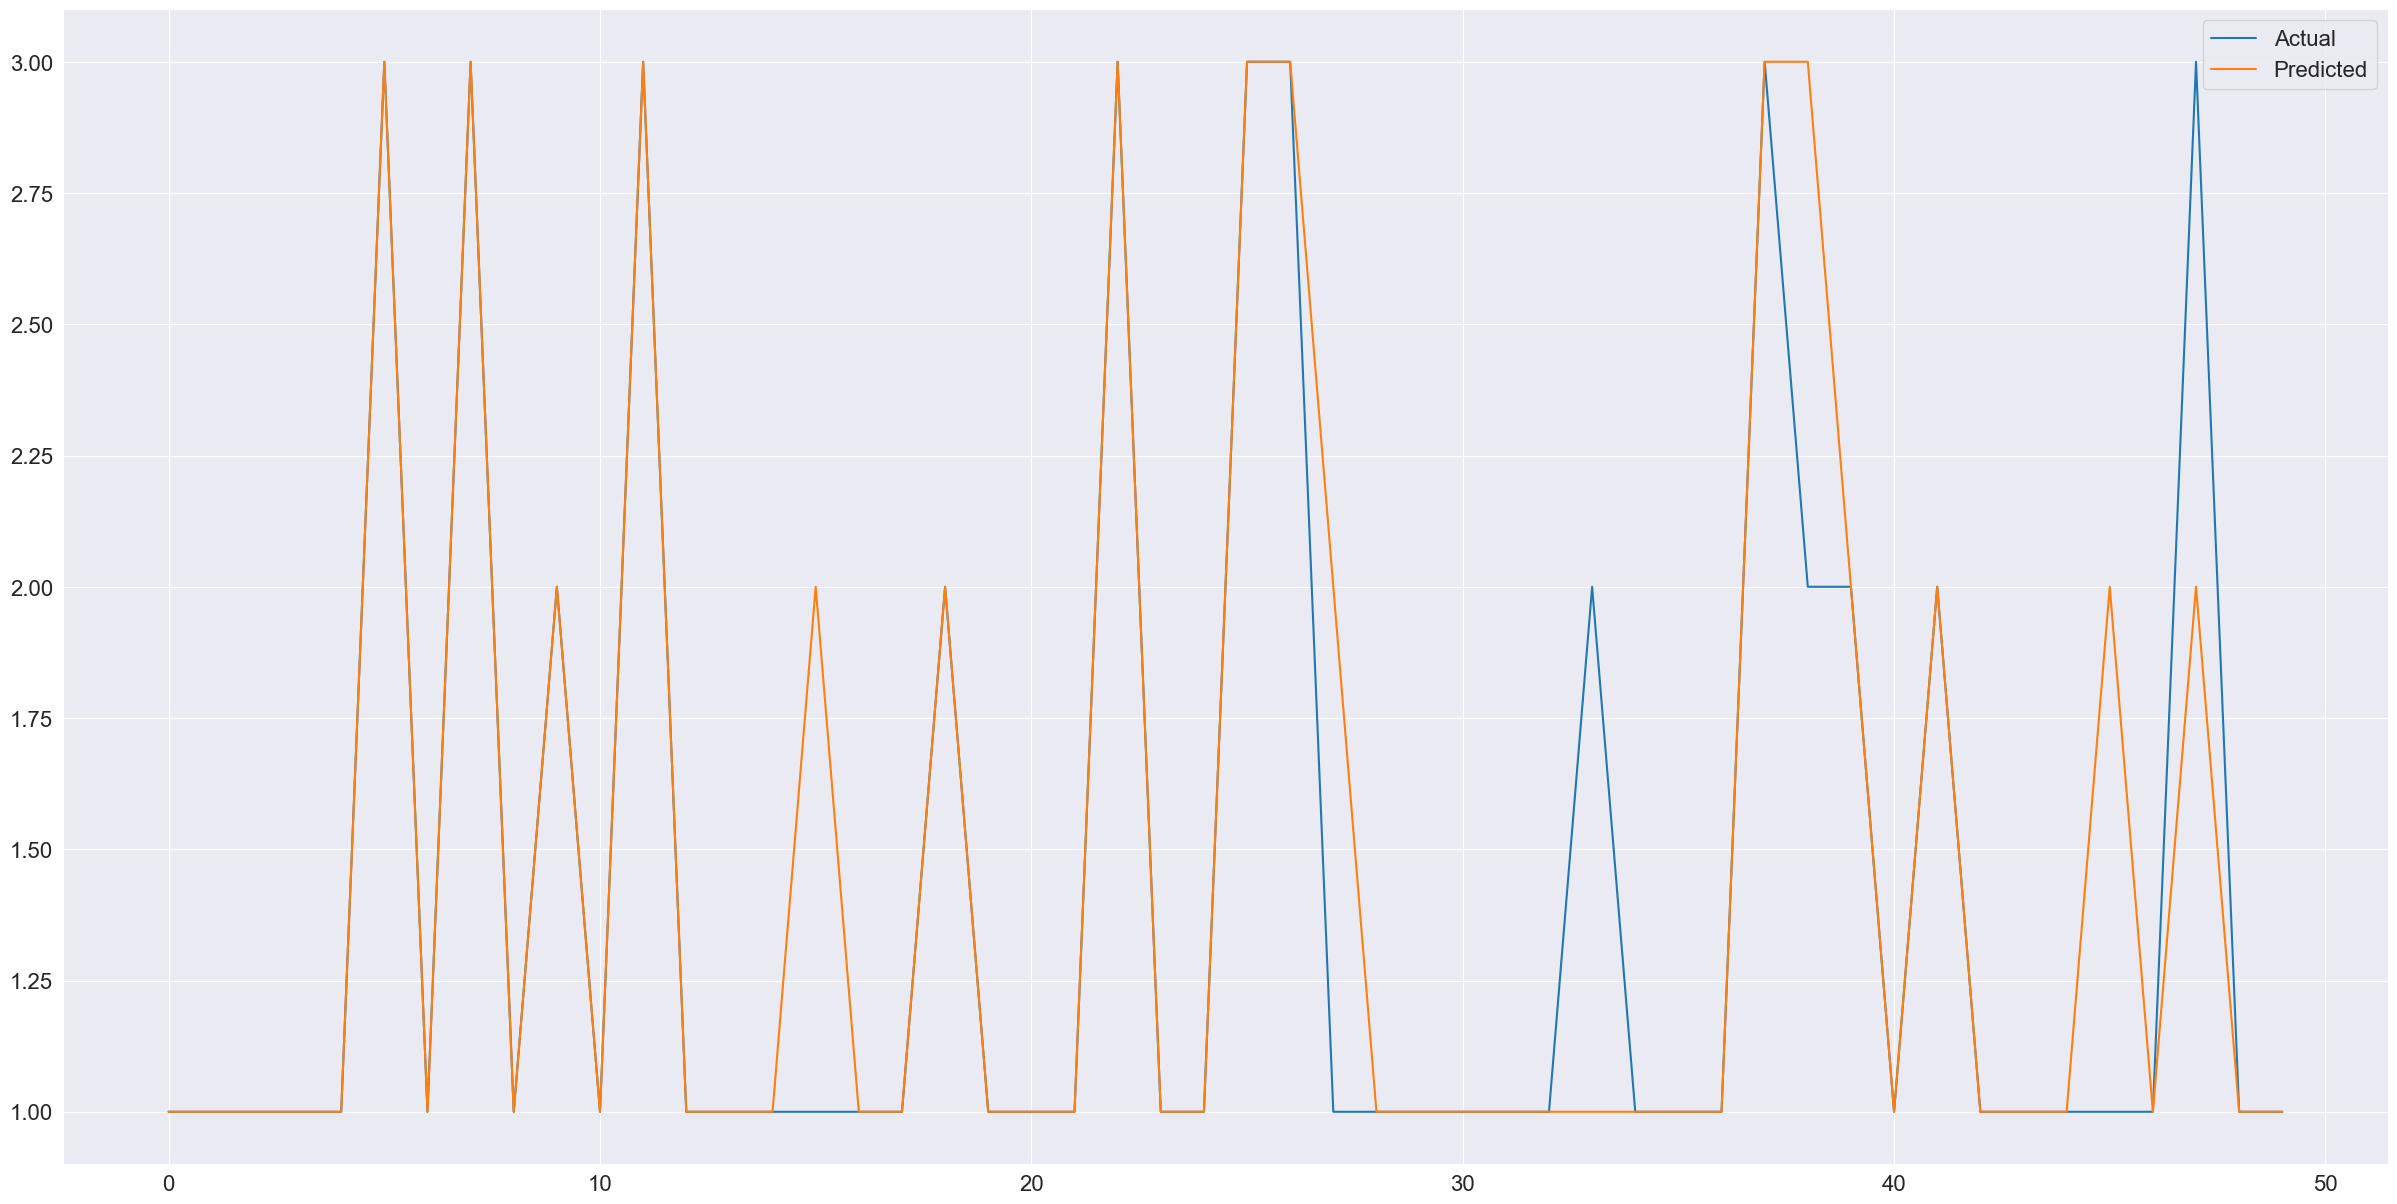

In [30]:
plt.figure(figsize=(30,15))
plt.plot(df[:50])
plt.legend(['Actual','Predicted'])
plt.show()

In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train.values,Y_train)
print(knn.score(X_train.values,Y_train))
print(knn.score(X_test.values,Y_test))

0.9334677419354839
0.9059561128526645


In [33]:
Y_pred=knn.predict(X_test.values)
df=pd.DataFrame({'Actual':Y_test,'Prediction':Y_pred})
df.head(7)

Actual  Prediction
0     1.0         1.0
1     1.0         1.0
2     1.0         1.0
3     1.0         1.0
4     1.0         1.0
5     3.0         3.0
6     1.0         1.0

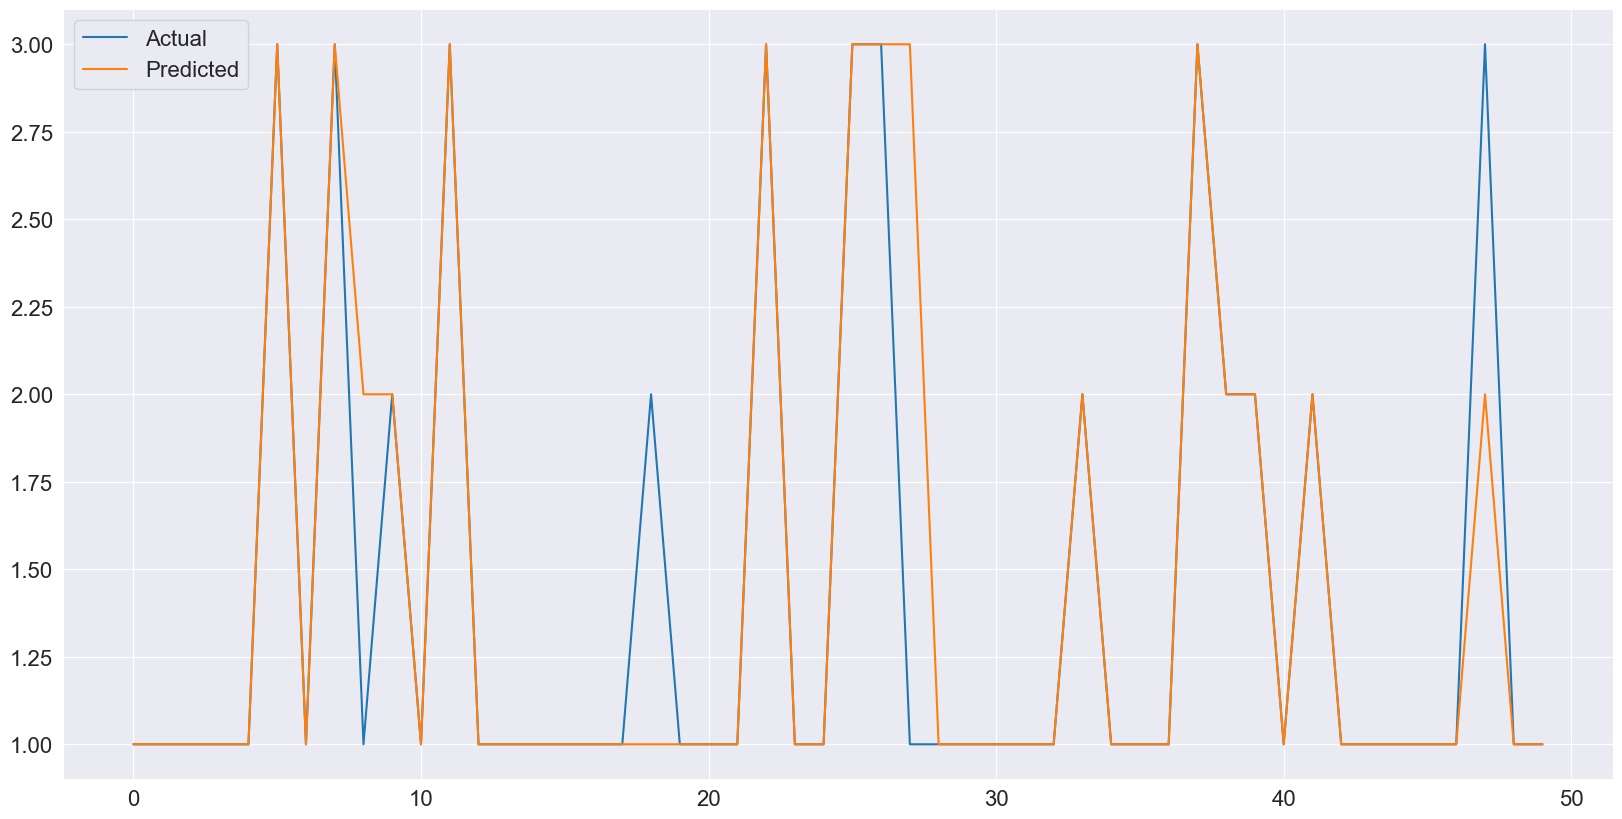

In [34]:
plt.figure(figsize=(20,10))
plt.plot(df[:50])
plt.legend(['Actual','Predicted'])
plt.show()

In [35]:
from sklearn.svm import SVC
svm=SVC(kernel='linear',C=2)
print(svm.fit(X_train,Y_train))
print(svm.score(X_train,Y_train))
print(svm.score(X_test,Y_test))


SVC(C=2, kernel='linear')
0.9247311827956989
0.8996865203761756


In [36]:
Rdc=RandomForestClassifier()
print(Rdc.fit(X_train.values,Y_train))
print(Rdc.score(X_train.values,Y_train))
print(Rdc.score(X_test.values,Y_test))

RandomForestClassifier()
1.0
0.9435736677115988


In [37]:
Y_pred=Rdc.predict(X_test.values)
df=pd.DataFrame({'Actual':Y_test,'Prediction':Y_pred})
df.head(7)

Actual  Prediction
0     1.0         1.0
1     1.0         1.0
2     1.0         1.0
3     1.0         1.0
4     1.0         1.0
5     3.0         3.0
6     1.0         1.0

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, ShuffleSplit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import learning_curve

In [39]:
sns.set(style='ticks')
plt.figure(figsize=(10,10))

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

Text(0, 0.5, 'Count')

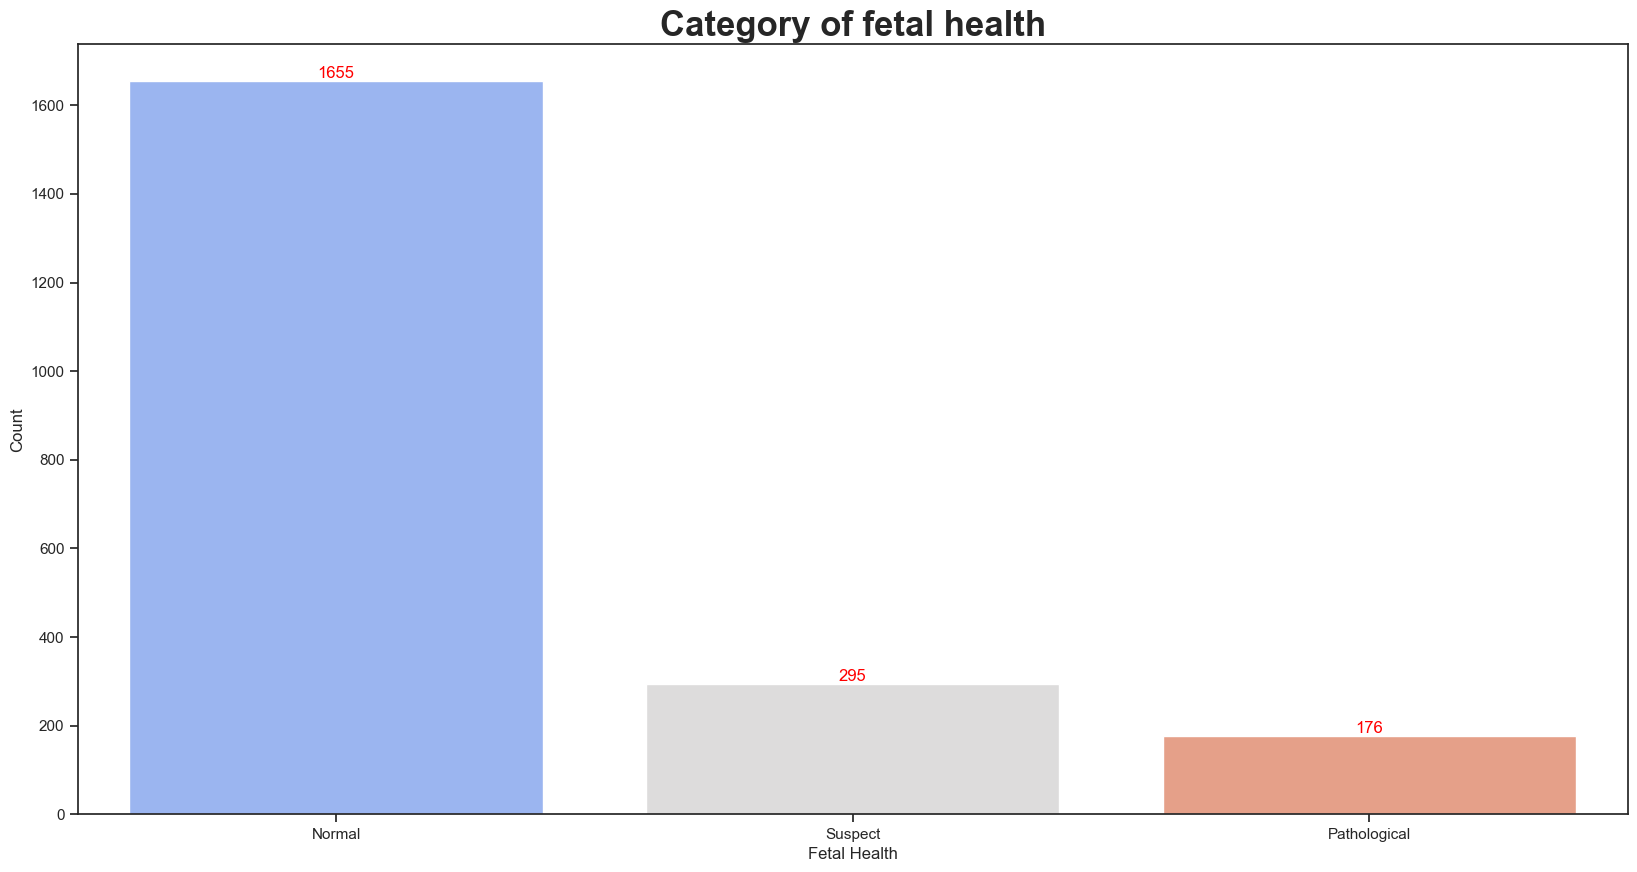

In [40]:
fh_status=sns.countplot(x='fetal_health',data=dataset,palette='coolwarm')
for number,count in enumerate(dataset['fetal_health'].value_counts()):
    fh_status.text(number,count,str(count),ha='center' ,va='bottom',fontsize=12,color='red')
    
plt.title('Category of fetal health',fontsize=25,fontweight='bold')

plt.xticks([0,1,2],['Normal','Suspect','Pathological'])
plt.xlabel('Fetal Health')
plt.ylabel('Count')
    

Text(0.5, 1.0, 'Pie chart ')

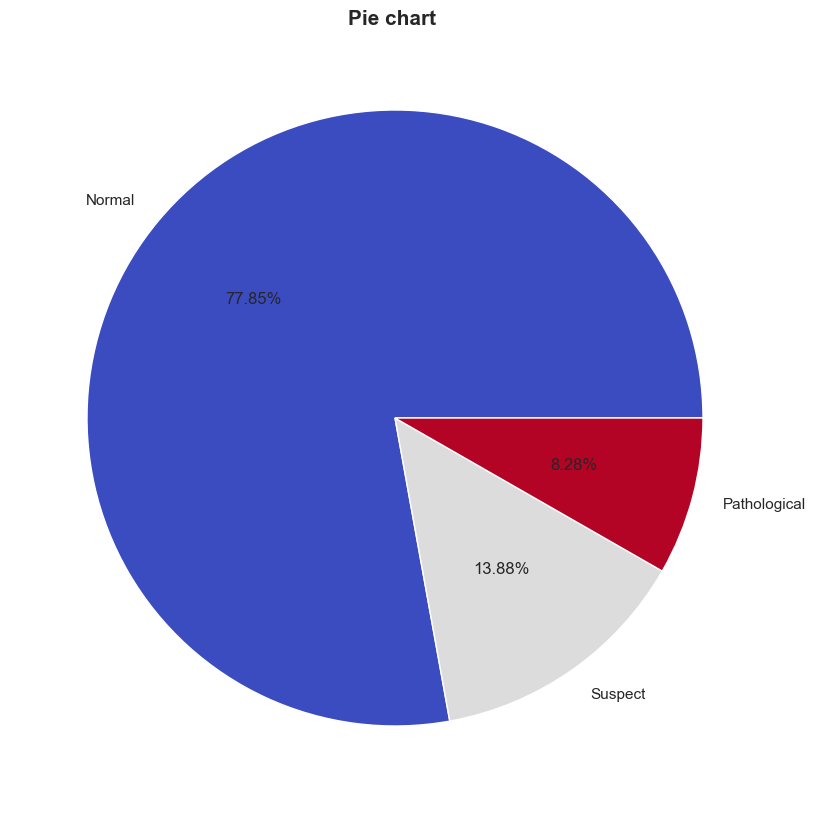

In [41]:
normal=(dataset['fetal_health']==1.0).sum()
suspect=(dataset['fetal_health']==2.0).sum()
pathological=(dataset['fetal_health']==3.0).sum()
pie_fetal_health=plt.pie([normal,suspect,pathological],labels=['Normal','Suspect','Pathological'],colors=plt.get_cmap('coolwarm')(np.linspace(0,1,3)),autopct="%1.2f%%")
plt.title(label='Pie chart ',fontsize=15,fontweight='bold')

In [42]:
correlation_matrix=dataset.corr()['fetal_health']

Text(0.5, 1.0, 'Correlation of numerical features with respect to fetal_health')

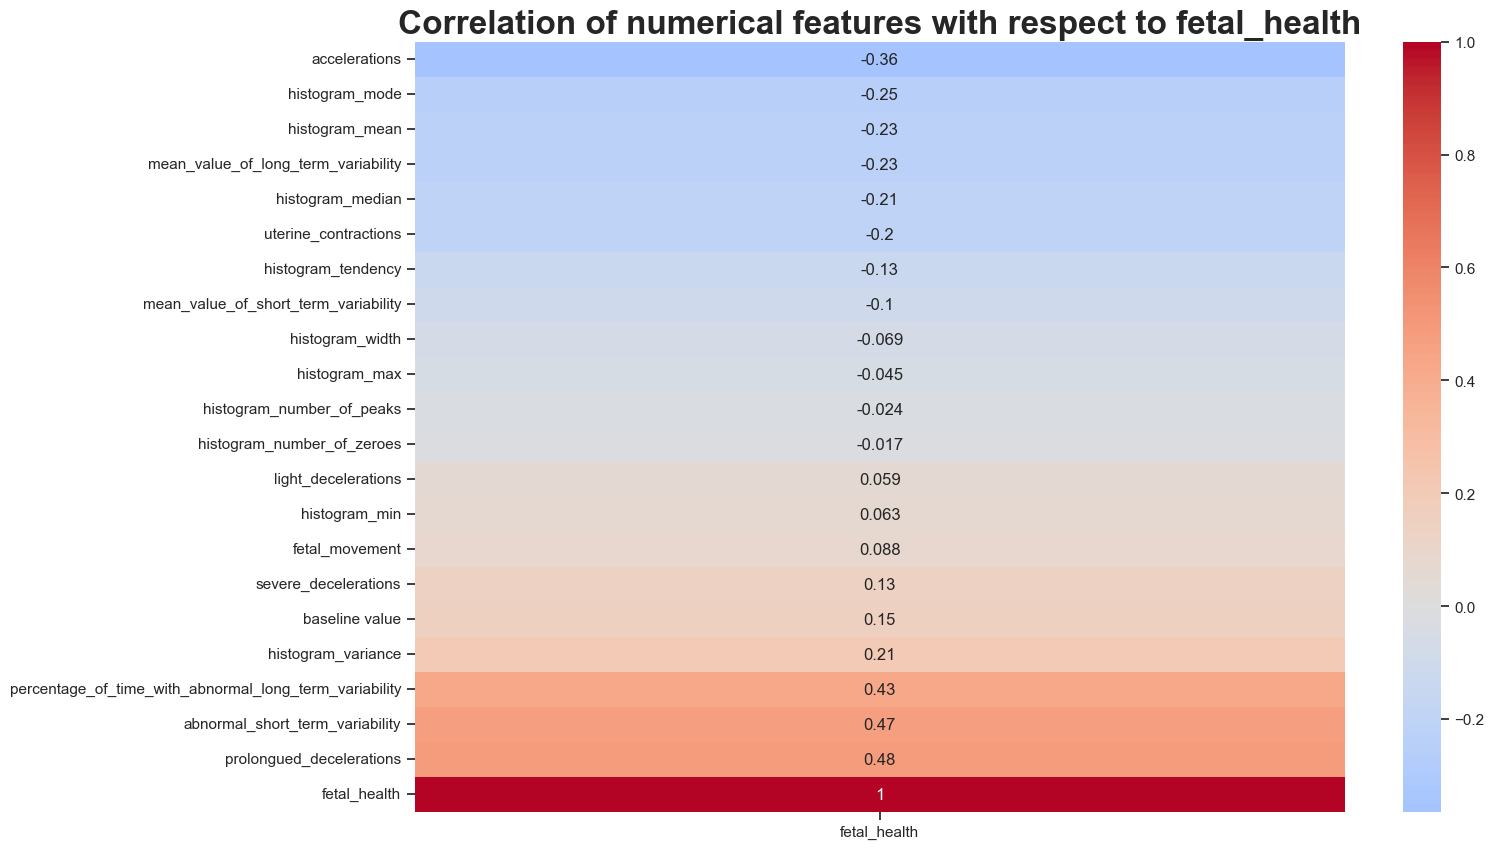

In [43]:
plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix.sort_values().to_frame(),annot=True,cmap='coolwarm',center=0)
plt.title("Correlation of numerical features with respect to fetal_health",fontsize=24,fontweight='bold')

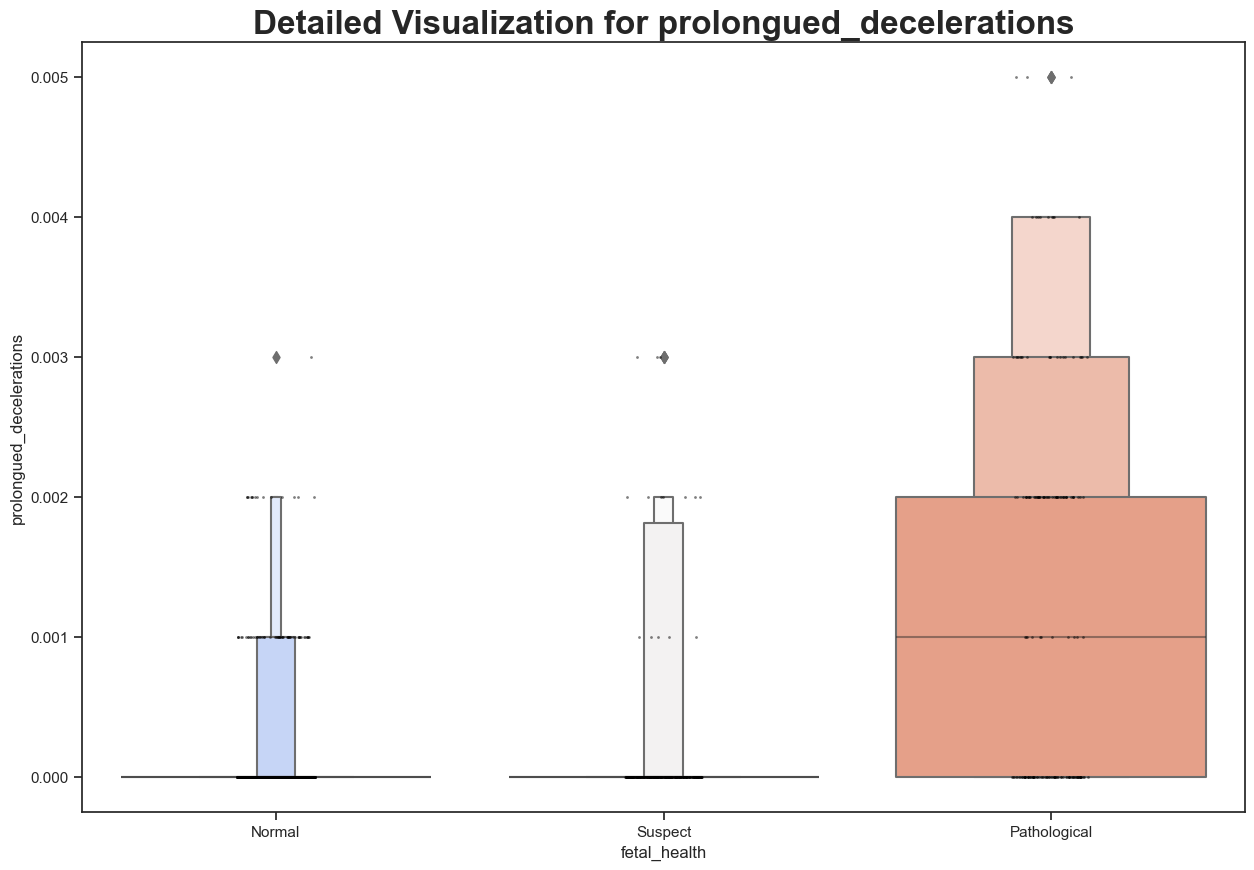

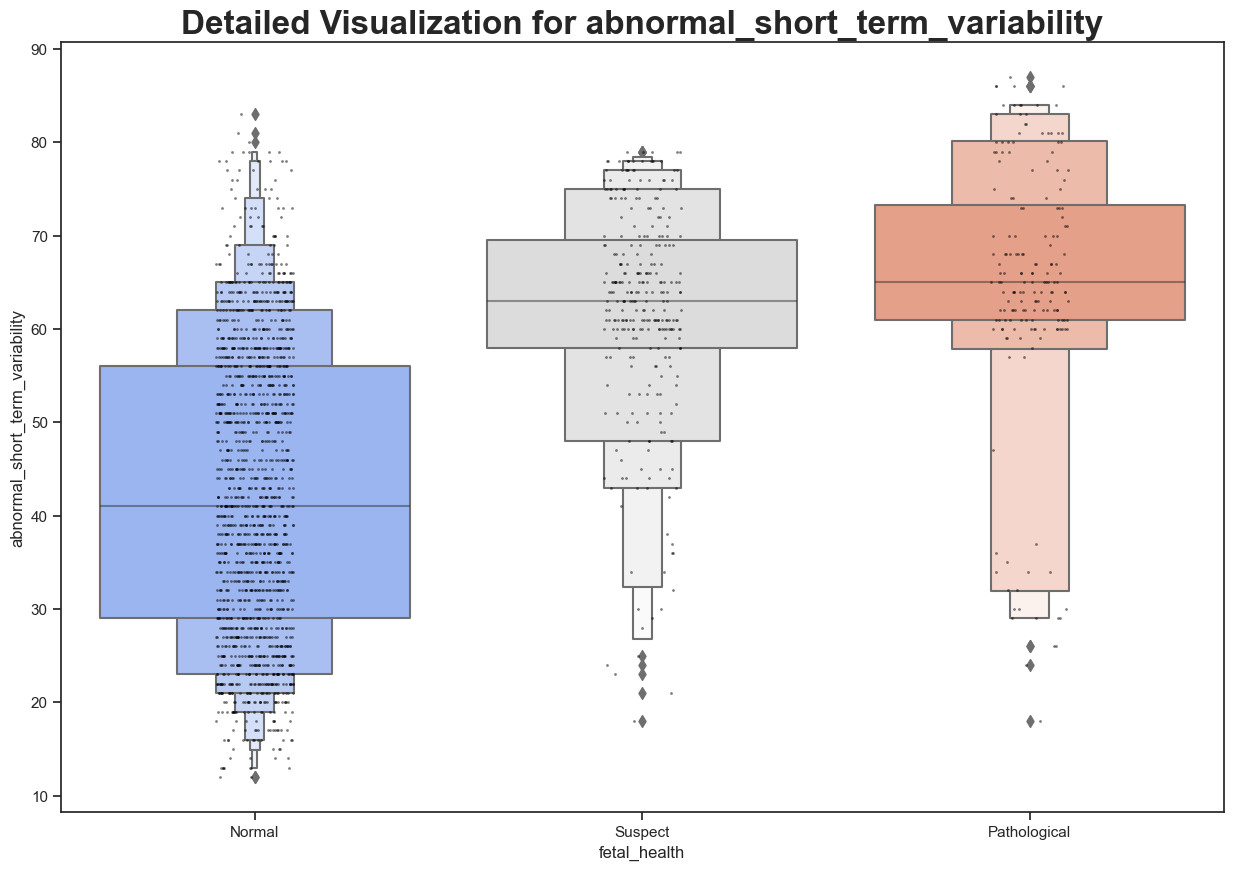

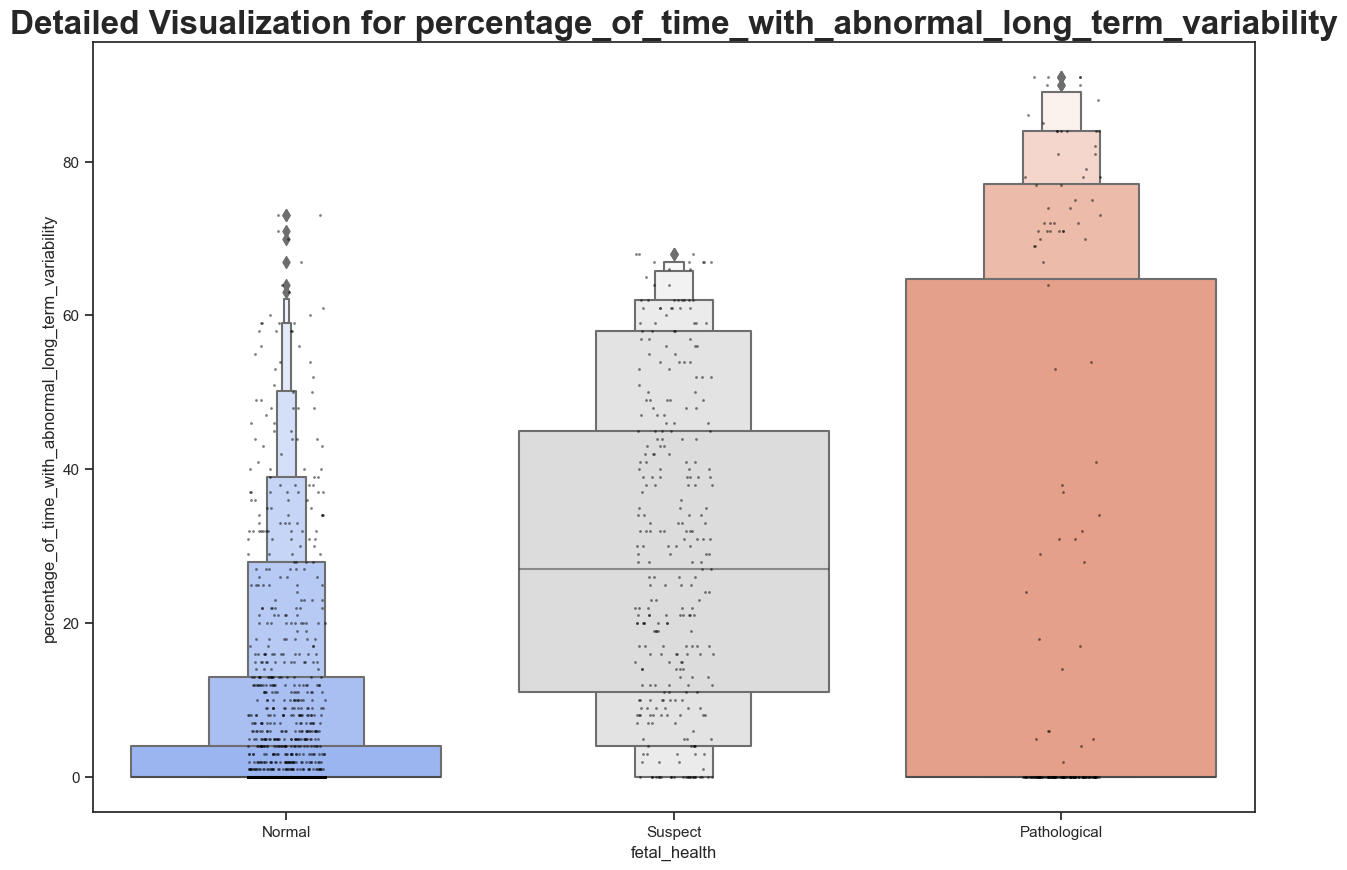

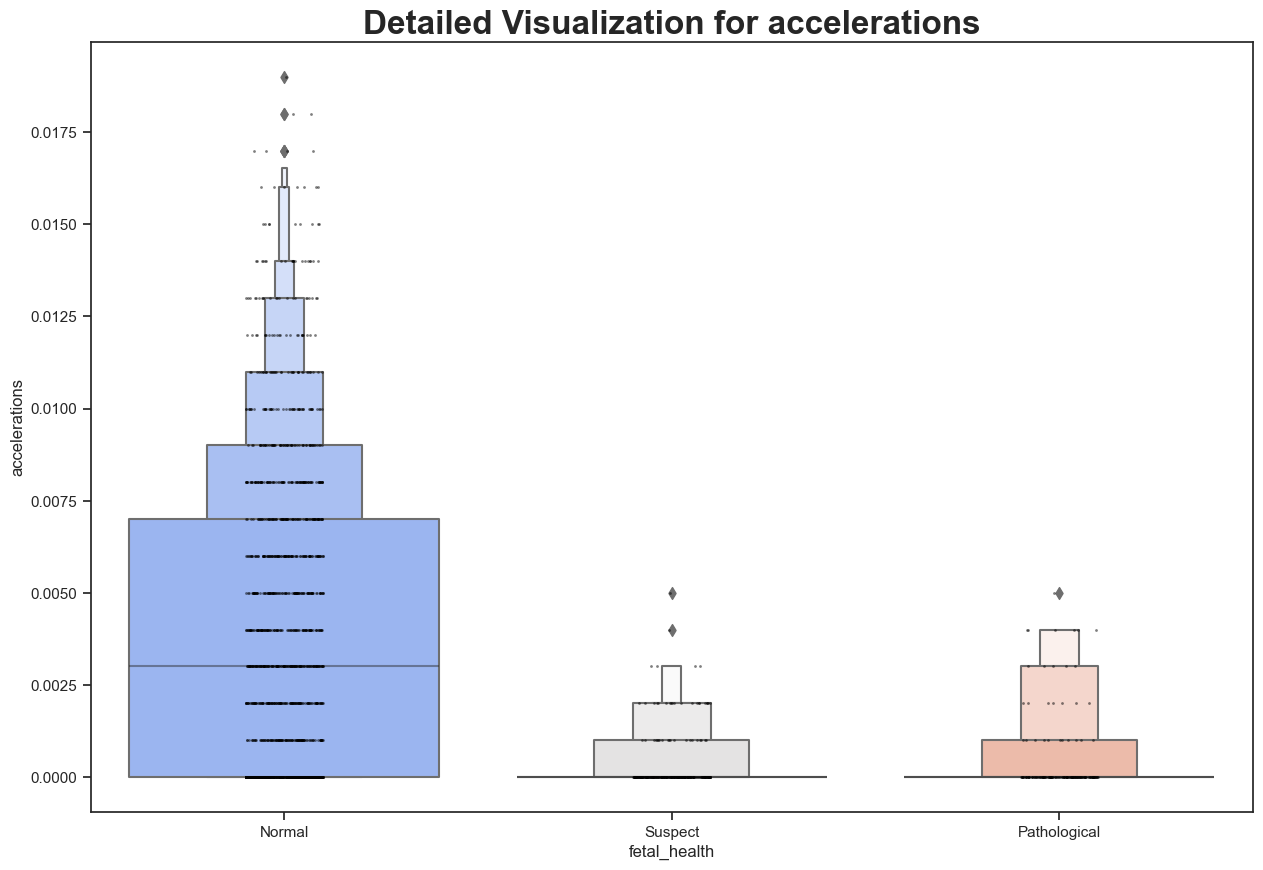

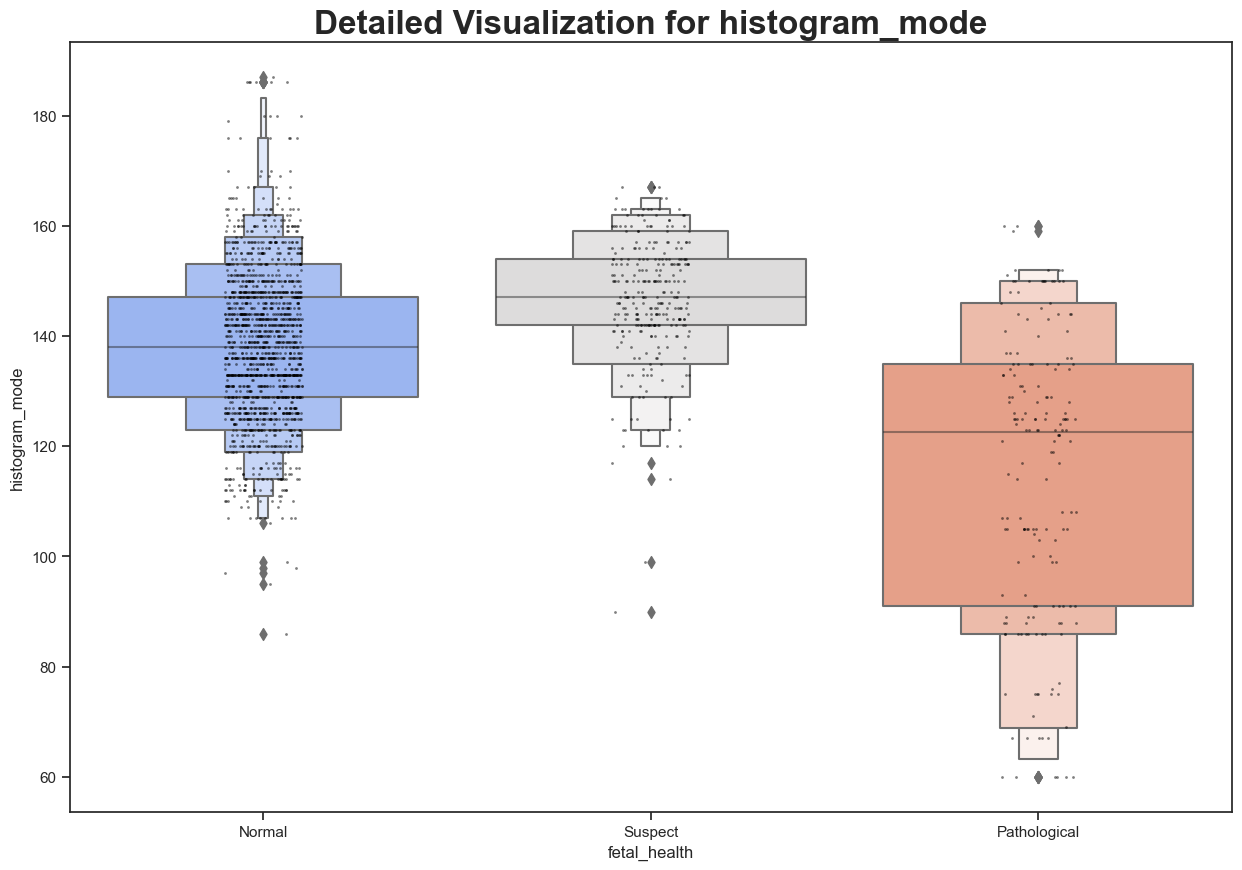

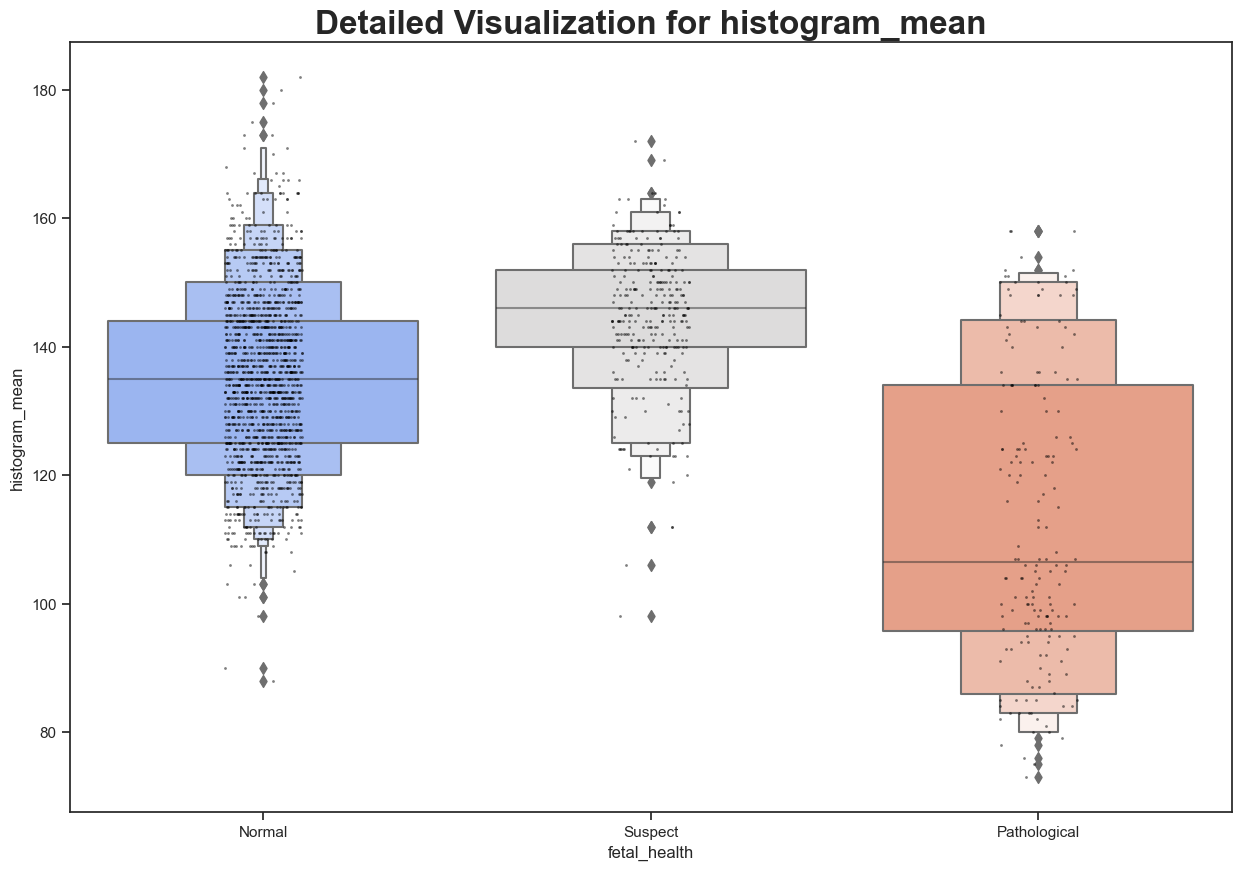

In [44]:
cols=['prolongued_decelerations','abnormal_short_term_variability','percentage_of_time_with_abnormal_long_term_variability','accelerations','histogram_mode','histogram_mean']

for i in cols:
    plt.figure(figsize=(15,10))
    sns.stripplot(x=dataset['fetal_health'],y=dataset[i],color='black',alpha=0.5,size=2,jitter=True,dodge=True)
    sns.boxenplot(x=dataset['fetal_health'],y=dataset[i],palette='coolwarm')
    plt.title(f'Detailed Visualization for {i}',fontsize=24,fontweight='bold')
    plt.xticks([0,1,2],['Normal','Suspect','Pathological'])
    

In [45]:
X=dataset.drop(['fetal_health'],axis=1)
Y=dataset['fetal_health']
bestfeatures=SelectKBest(score_func=f_classif,k='all')
fit=bestfeatures.fit(X,Y)
dfscores=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(X.columns)

In [46]:
featureScores=pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns=['Feature','Score']

featureScores=featureScores.sort_values(by='Score',ascending=False)
print(featureScores)

                                              Feature       Score
6                            prolongued_decelerations  505.853206
9   percentage_of_time_with_abnormal_long_term_var...  345.156385
7                     abnormal_short_term_variability  343.820419
17                                     histogram_mean  297.625497
16                                     histogram_mode  275.117696
18                                   histogram_median  248.772237
1                                       accelerations  196.027523
19                                 histogram_variance  150.796849
0                                      baseline value  140.621076
8                mean_value_of_short_term_variability  119.882006
3                                uterine_contractions   93.715743
12                                      histogram_min   87.340503
10                mean_value_of_long_term_variability   70.174093
4                                 light_decelerations   66.864754
11        

Text(0.5, 1.0, 'Feature Importance')

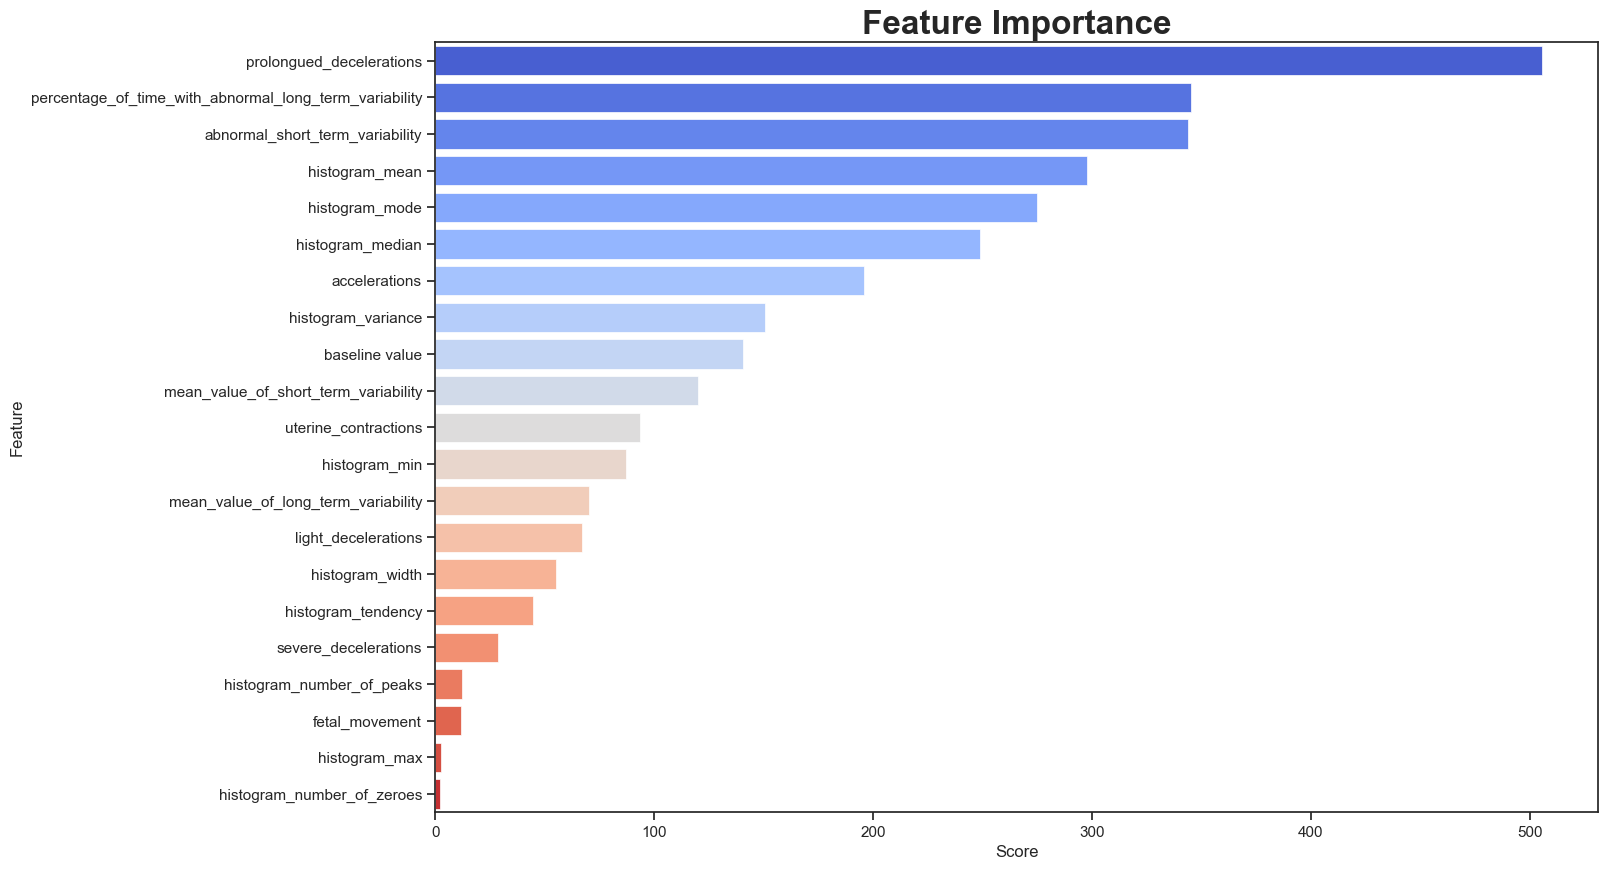

In [47]:
fig,ax=plt.subplots(figsize=(15,10))
plot=sns.barplot(data=featureScores,x='Score',y='Feature',palette='coolwarm',linewidth=0.5,saturation=2,orient='h')

plt.title('Feature Importance',fontsize=24,fontweight='bold')


In [48]:
low_score_features=featureScores[featureScores['Score']<15]
print(low_score_features)

                       Feature      Score
14   histogram_number_of_peaks  12.104834
2               fetal_movement  11.679797
13               histogram_max   2.464923
15  histogram_number_of_zeroes   2.196373


In [49]:
features_to_drop=['histogram_number_of_peaks','fetal_movement','histogram_max','histogram_number_of_zeroes']
dataset=dataset.drop(features_to_drop, axis=1)

(array([-50.,   0.,  50., 100., 150., 200., 250., 300.]),
 [Text(0, -50.0, '−50'),
  Text(0, 0.0, '0'),
  Text(0, 50.0, '50'),
  Text(0, 100.0, '100'),
  Text(0, 150.0, '150'),
  Text(0, 200.0, '200'),
  Text(0, 250.0, '250'),
  Text(0, 300.0, '300')])

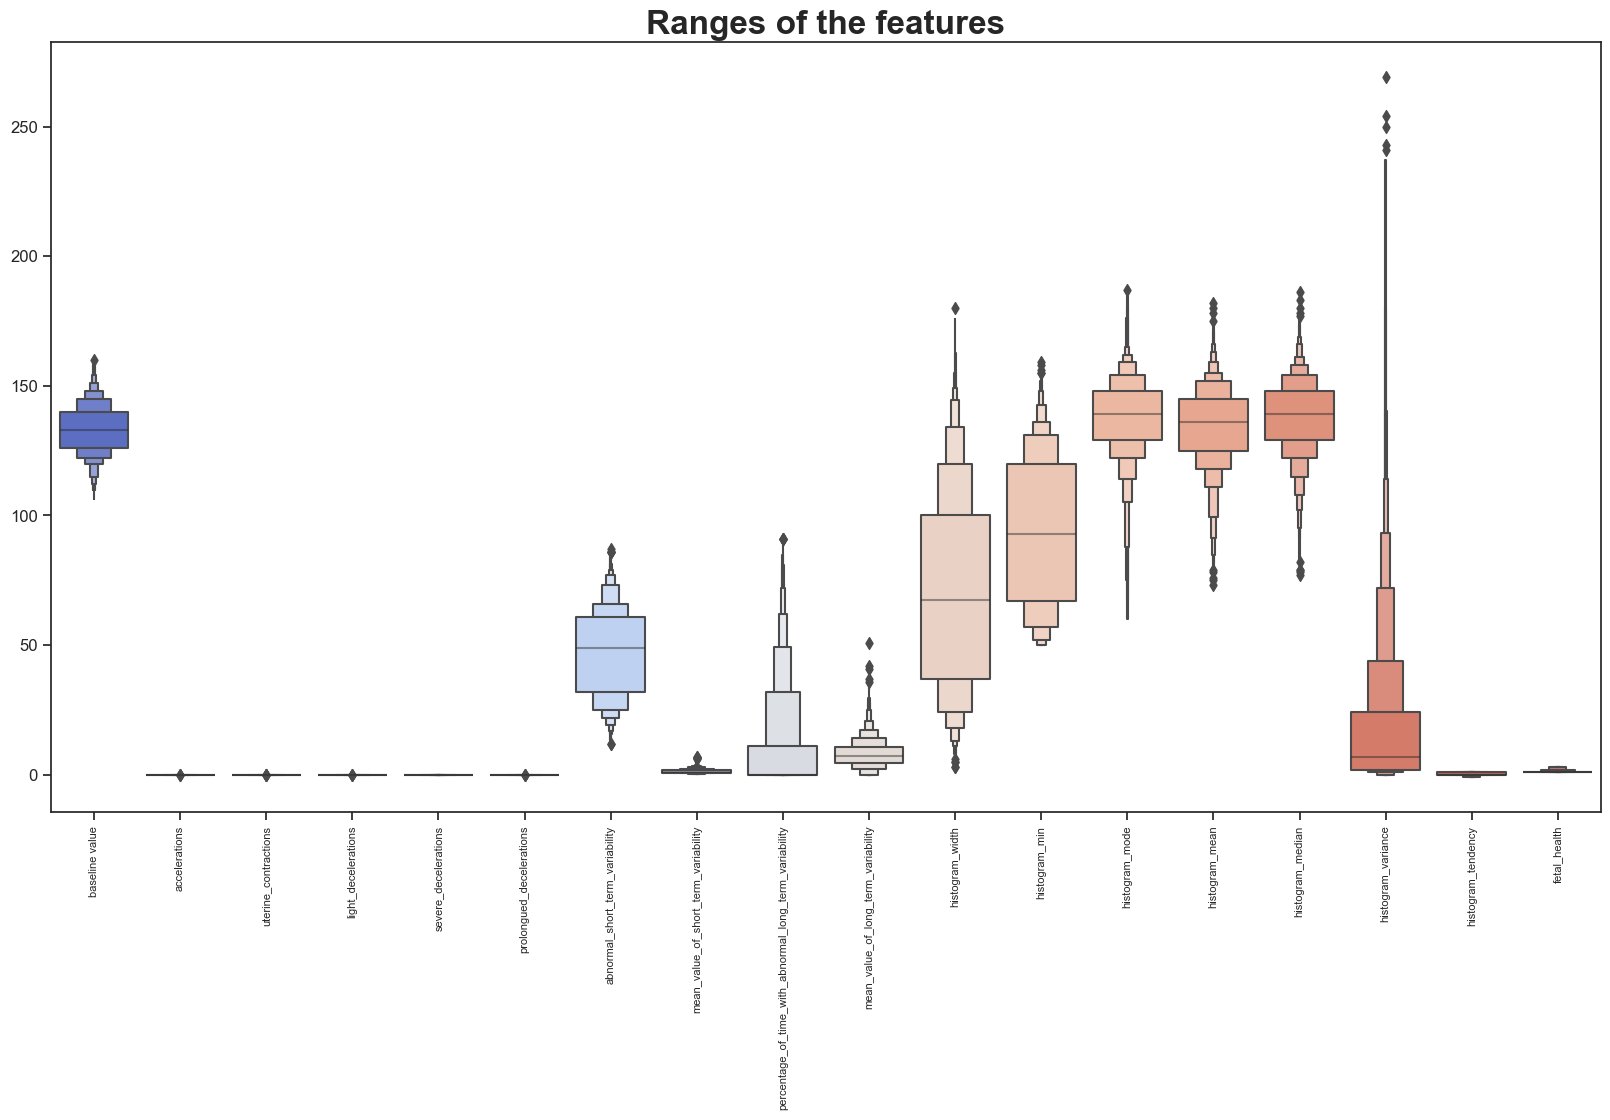

In [50]:
plt.figure(figsize=(20,10))
sns.boxenplot(data=dataset,palette='coolwarm')

plt.title('Ranges of the features',fontsize=24,fontweight='bold')
plt.xticks(rotation=90,fontsize=8)
plt.yticks(fontsize=12)


In [51]:
X=dataset.drop(['fetal_health'],axis=1)
y=dataset['fetal_health']

In [52]:
col_names=list(X.columns)
s_scaler=preprocessing.StandardScaler()
X_df=s_scaler.fit_transform(X)
X_df=pd.DataFrame(X_df,columns=col_names)

In [53]:
X_df.describe().T

count          mean  \
baseline value                                      2126.0  1.069490e-15   
accelerations                                       2126.0 -4.010589e-17   
uterine_contractions                                2126.0 -1.336863e-16   
light_decelerations                                 2126.0 -5.347452e-17   
severe_decelerations                                2126.0  6.684315e-18   
prolongued_decelerations                            2126.0  1.336863e-17   
abnormal_short_term_variability                     2126.0 -7.352747e-17   
mean_value_of_short_term_variability                2126.0  6.684315e-17   
percentage_of_time_with_abnormal_long_term_vari...  2126.0 -5.347452e-17   
mean_value_of_long_term_variability                 2126.0  2.406354e-16   
histogram_width                                     2126.0 -3.007942e-17   
histogram_min                                       2126.0 -4.679021e-17   
histogram_mode                                      2126.0  1.069490e-16   
histogram_mean                                      2126.0 -6.684315e-16   
histogram_median                                    2126.0  2.673726e-16   
histogram_variance                                  2126.0 -5.347452e-17   
histogram_tendency                                  2126.0 -1.069490e-16   

                                                         std       min  \
baseline value                                      1.000235 -2.775197   
accelerations                                       1.000235 -0.822388   
uterine_contractions                                1.000235 -1.482465   
light_decelerations                                 1.000235 -0.638438   
severe_decelerations                                1.000235 -0.057476   
prolongued_decelerations                            1.000235 -0.268754   
abnormal_short_term_variability                     1.000235 -2.035639   
mean_value_of_short_term_variability                1.000235 -1.282833   
percentage_of_time_with_abnormal_long_term_vari...  1.000235 -0.535361   
mean_value_of_long_term_variability                 1.000235 -1.455081   
histogram_width                                     1.000235 -1.731757   
histogram_min                                       1.000235 -1.474609   
histogram_mode                                      1.000235 -4.729191   
histogram_mean                                      1.000235 -3.951945   
histogram_median                                    1.000235 -4.223849   
histogram_variance                                  1.000235 -0.649208   
histogram_tendency                                  1.000235 -2.162031   

                                                         25%       50%  \
baseline value                                     -0.742373 -0.030884   
accelerations                                      -0.822388 -0.304881   
uterine_contractions                               -0.803434 -0.124404   
light_decelerations                                -0.638438 -0.638438   
severe_decelerations                               -0.057476 -0.057476   
prolongued_decelerations                           -0.268754 -0.268754   
abnormal_short_term_variability                    -0.872088  0.116930   
mean_value_of_short_term_variability               -0.716603 -0.150373   
percentage_of_time_with_abnormal_long_term_vari... -0.535361 -0.535361   
mean_value_of_long_term_variability                -0.637583 -0.139975   
histogram_width                                    -0.858765 -0.075640   
histogram_min                                      -0.899376 -0.019608   
histogram_mode                                     -0.516077  0.094519   
histogram_mean                                     -0.616458  0.089126   
histogram_median                                   -0.628514  0.062897   
histogram_variance                                 -0.580173 -0.407586   
histogram_tendency                                 -0.524526 -0.524526   

                  

(array([-10.,  -5.,   0.,   5.,  10.,  15.,  20.]),
 [Text(0, -10.0, '−10'),
  Text(0, -5.0, '−5'),
  Text(0, 0.0, '0'),
  Text(0, 5.0, '5'),
  Text(0, 10.0, '10'),
  Text(0, 15.0, '15'),
  Text(0, 20.0, '20')])

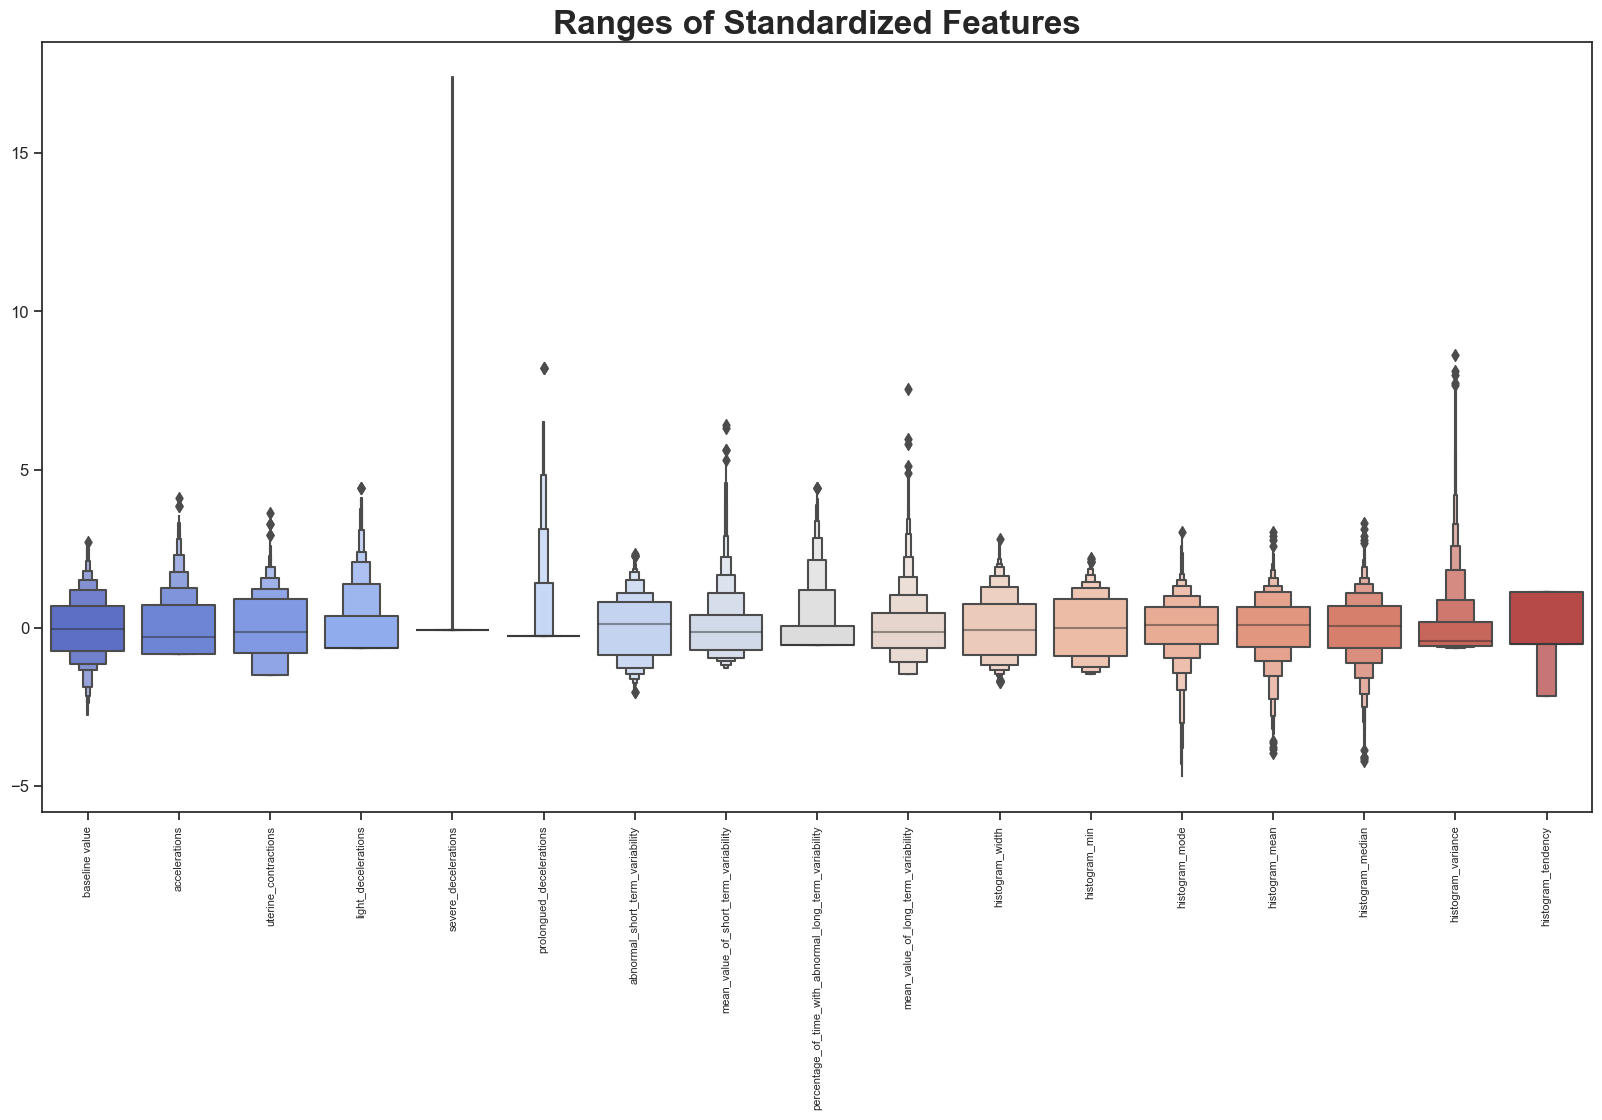

In [54]:
plt.figure(figsize=(20,10))
sns.boxenplot(data=X_df,palette='coolwarm')

plt.title('Ranges of Standardized Features',fontsize=24,fontweight='bold')
plt.xticks(rotation=90,fontsize=8)
plt.yticks(fontsize=12)


In [55]:
X_train,X_test,y_train,y_test=train_test_split(X_df,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1700, 17), (426, 17), (1700,), (426,))

In [56]:
knn=KNeighborsClassifier()

In [57]:
param_knn={
    'n_neighbors':list(range(1,31)),
    'p':(1,2),
    'weights':('uniform','distance'),
    'metric':('minkowski','chebyshev')
}

In [58]:
grid_search_knn=GridSearchCV(knn,param_knn,cv=10,n_jobs=-1,scoring='accuracy')
grid_search_knn.fit(X_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:976: UserWarning:

One or more of the test scores are non-finite: [       nan 0.90823529        nan 0.90588235        nan 0.90823529
        nan 0.90588235        nan 0.91058824        nan 0.90529412
        nan 0.91117647        nan 0.90588235        nan 0.90882353
        nan 0.91294118        nan 0.91411765        nan 0.91
        nan 0.90941176        nan 0.90647059        nan 0.91294118
        nan 0.90705882        nan 0.90823529        nan 0.90235294
        nan 0.91176471        nan 0.90294118        nan 0.91176471
        nan 0.90294118        nan 0.91              nan 0.90294118
        nan 0.90764706        nan 0.9               nan 0.90705882
        nan 0.89823529        nan 0.90529412        nan 0.89647059
        nan 0.90470588        nan 0.9               nan 0.90352941
        nan 0.89764706        nan 0.90117647        nan 0.89764706
        nan 0.90294118        nan 0.89588235        nan 0.

GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ('minkowski', 'chebyshev'),
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'p': (1, 2), 'weights': ('uniform', 'distance')},
             scoring='accuracy')

In [59]:
grid_search_knn.best_params_


{'metric': 'minkowski', 'n_neighbors': 6, 'p': 1, 'weights': 'distance'}

In [60]:
knn=KNeighborsClassifier(n_neighbors=4,metric='minkowski',p=1,weights='distance')
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=4, p=1, weights='distance')

In [61]:
y_pred=knn.predict(X_test)
accuracy_score(y_test,y_pred)*100

92.48826291079813

In [62]:
pd.DataFrame({'Prediction':y_pred[:20],'Actual':y_test[:20]})



Prediction  Actual
282          1.0     1.0
1999         1.0     1.0
1709         1.0     1.0
988          1.0     1.0
2018         1.0     1.0
297          3.0     3.0
1737         1.0     1.0
651          3.0     3.0
70           2.0     1.0
290          2.0     2.0
1713         1.0     1.0
1951         3.0     3.0
507          1.0     1.0
1376         1.0     1.0
914          1.0     1.0
450          1.0     1.0
1615         1.0     1.0
1781         1.0     1.0
196          2.0     2.0
109          1.0     1.0

In [63]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         1.0       0.95      0.97      0.96       333
         2.0       0.80      0.73      0.76        64
         3.0       0.86      0.83      0.84        29

    accuracy                           0.92       426
   macro avg       0.87      0.84      0.86       426
weighted avg       0.92      0.92      0.92       426



[Text(0, 0.5, 'Normal'), Text(0, 1.5, 'Suspect'), Text(0, 2.5, 'Pathological')]

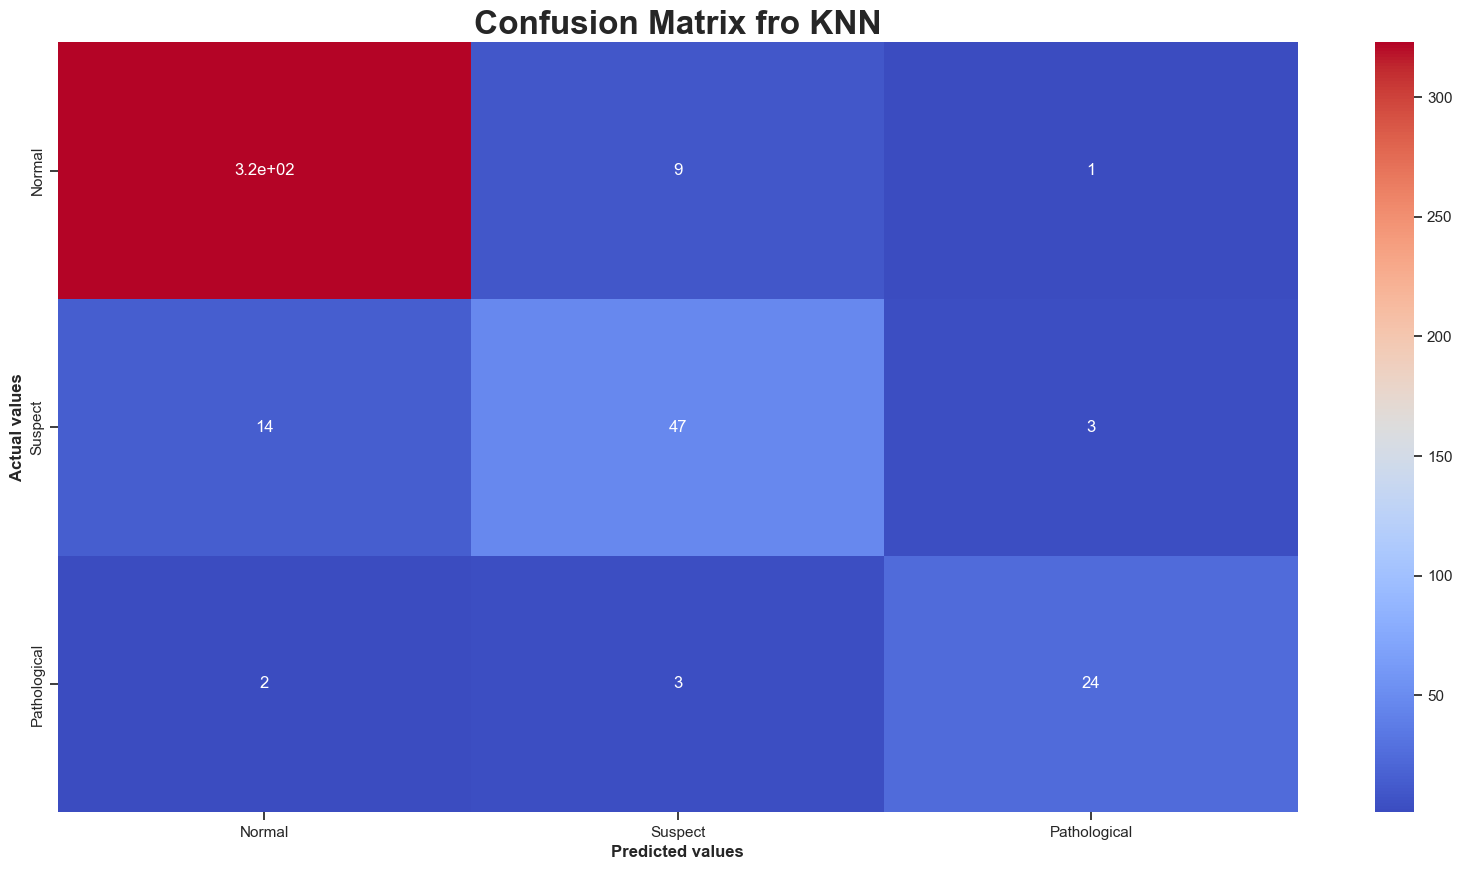

In [64]:
ax=plt.subplot()
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,ax=ax,cmap='coolwarm')

ax.set_xlabel('Predicted values',fontweight='bold')
ax.set_ylabel('Actual values',fontweight='bold')
ax.set_title('Confusion Matrix fro KNN',fontsize=24,fontweight='bold')
ax.xaxis.set_ticklabels(['Normal','Suspect','Pathological'])
ax.yaxis.set_ticklabels(['Normal','Suspect','Pathological'])

In [65]:
rf=RandomForestClassifier()

In [66]:
param_grid={
    'n_estimators':[50,100,200],
    'max_depth':[None,10,20],
    'min_samples_split':[2,5,10],
}
grid_search_rf=GridSearchCV(RandomForestClassifier(random_state=42),param_grid,cv=10)
grid_search_rf.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [67]:
best_params_for_rf=grid_search_rf.best_params_
print(best_params_for_rf)

{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}


In [68]:
rf_classifier=RandomForestClassifier(**best_params_for_rf,random_state=42)
rf_classifier.fit(X_train,y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

In [69]:
y_pred_rf=rf_classifier.predict(X_test)
accuracy_score(y_test,y_pred_rf)*100

94.60093896713614

In [70]:
pd.DataFrame({'Prediction':y_pred_rf[:20],'Actual':y_test[:20]})

Prediction  Actual
282          1.0     1.0
1999         1.0     1.0
1709         1.0     1.0
988          1.0     1.0
2018         1.0     1.0
297          3.0     3.0
1737         1.0     1.0
651          3.0     3.0
70           2.0     1.0
290          2.0     2.0
1713         1.0     1.0
1951         3.0     3.0
507          1.0     1.0
1376         1.0     1.0
914          1.0     1.0
450          1.0     1.0
1615         1.0     1.0
1781         1.0     1.0
196          2.0     2.0
109          1.0     1.0

In [71]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

         1.0       0.96      0.98      0.97       333
         2.0       0.86      0.80      0.83        64
         3.0       0.90      0.93      0.92        29

    accuracy                           0.95       426
   macro avg       0.91      0.90      0.90       426
weighted avg       0.94      0.95      0.95       426



[Text(0, 0.5, 'Normal'), Text(0, 1.5, 'Suspect'), Text(0, 2.5, 'Pathological')]

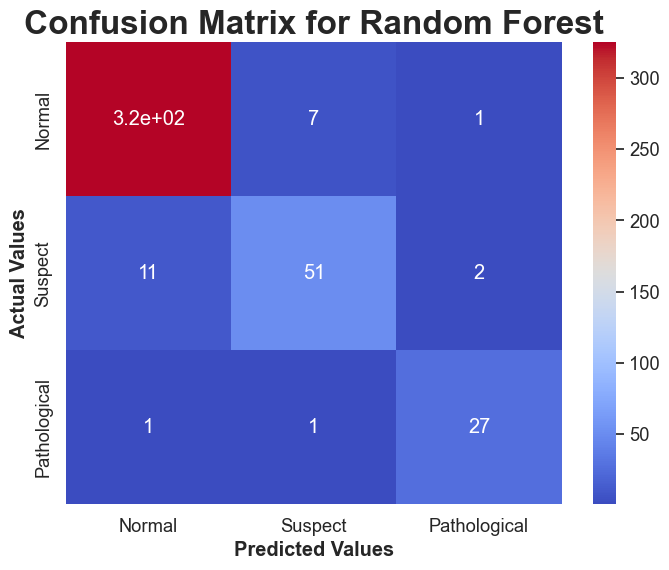

In [72]:
plt.figure(figsize=(8,6))
sns.set(font_scale=1.2)
ax=plt.subplot()
sns.heatmap(confusion_matrix(y_test,y_pred_rf),annot=True,ax=ax,cmap='coolwarm')
ax.set_xlabel('Predicted Values',fontweight='bold')
ax.set_ylabel('Actual Values',fontweight='bold')
ax.set_title('Confusion Matrix for Random Forest',fontsize=24,fontweight='bold')
ax.xaxis.set_ticklabels(['Normal','Suspect','Pathological'])
ax.yaxis.set_ticklabels(['Normal','Suspect','Pathological'])


In [73]:
svc=SVC()


In [74]:
param_grid_svc={
    'C':[0,1,1,10],
    'gamma':['scale','auto',0.001,0.01],
    'kernel':['linear','rbf','poly'],
}
grid_search_svc=GridSearchCV(SVC(random_state=42),param_grid_svc,cv=10)
grid_search_svc.fit(X_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning:


120 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\ProgramData\anaconda3\Lib\site-packa

GridSearchCV(cv=10, estimator=SVC(random_state=42),
             param_grid={'C': [0, 1, 1, 10],
                         'gamma': ['scale', 'auto', 0.001, 0.01],
                         'kernel': ['linear', 'rbf', 'poly']})

In [75]:
best_params_for_svc=grid_search_svc.best_params_

In [76]:
print(best_params_for_svc)

{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


In [77]:
svc_classifier=SVC(**best_params_for_svc,random_state=42)
svc_classifier.fit(X_train,y_train)

SVC(C=10, random_state=42)

In [78]:
y_pred_svc=svc_classifier.predict(X_test)
accuracy_score(y_test,y_pred_svc)*100

92.72300469483568

In [79]:
pd.DataFrame({'Prediction':y_pred_svc[:20],'Actual':y_test[:20]})

Prediction  Actual
282          1.0     1.0
1999         1.0     1.0
1709         1.0     1.0
988          1.0     1.0
2018         1.0     1.0
297          3.0     3.0
1737         1.0     1.0
651          3.0     3.0
70           2.0     1.0
290          2.0     2.0
1713         1.0     1.0
1951         3.0     3.0
507          1.0     1.0
1376         1.0     1.0
914          1.0     1.0
450          2.0     1.0
1615         1.0     1.0
1781         1.0     1.0
196          2.0     2.0
109          1.0     1.0

[Text(0, 0.5, 'Normal'), Text(0, 1.5, 'Suspect'), Text(0, 2.5, 'Pathological')]

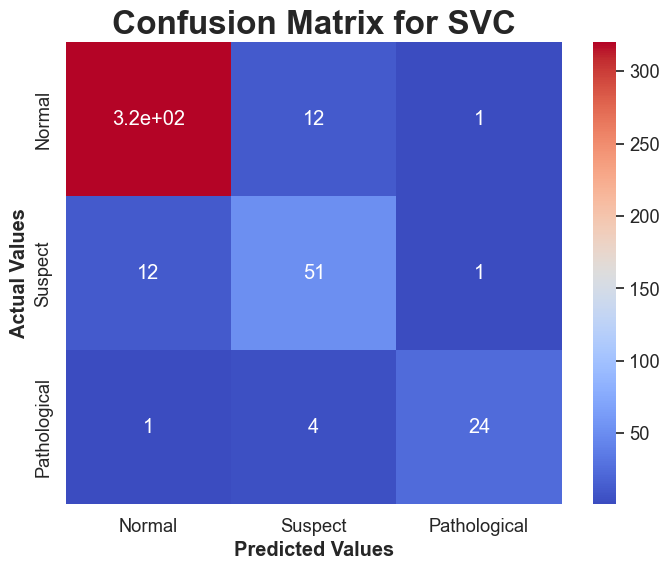

In [80]:
plt.figure(figsize=(8,6))
sns.set(font_scale=1.2)
ax=plt.subplot()

sns.heatmap(confusion_matrix(y_test,y_pred_svc),annot=True,ax=ax,cmap='coolwarm')
ax.set_xlabel('Predicted Values',fontweight='bold')
ax.set_ylabel('Actual Values',fontweight='bold')
ax.set_title('Confusion Matrix for SVC',fontsize=24,fontweight='bold')
ax.xaxis.set_ticklabels(['Normal','Suspect','Pathological'])
ax.yaxis.set_ticklabels(['Normal','Suspect','Pathological'])

                         

In [81]:
print(classification_report(y_test,y_pred_svc))


              precision    recall  f1-score   support

         1.0       0.96      0.96      0.96       333
         2.0       0.76      0.80      0.78        64
         3.0       0.92      0.83      0.87        29

    accuracy                           0.93       426
   macro avg       0.88      0.86      0.87       426
weighted avg       0.93      0.93      0.93       426



In [82]:
 pd.DataFrame({
    'Model':['KNN','Random Forest','SVC'],
    'Training Score':[knn.score(X_train,y_train),rf_classifier.score(X_train,y_train),svc_classifier.score(X_train,y_train)],
    'Test Score':[accuracy_score(y_test,y_pred),accuracy_score(y_test,y_pred_rf),accuracy_score(y_test,y_pred_svc)],
    'Error':[knn.score(X_train,y_train)-accuracy_score(y_test,y_pred),rf_classifier.score(X_train,y_train)-accuracy_score(y_test,y_pred_rf),svc_classifier.score(X_train,y_train)-accuracy_score(y_test,y_pred_svc)]
})

Model  Training Score  Test Score     Error
0            KNN        1.000000    0.924883  0.075117
1  Random Forest        0.999412    0.946009  0.053402
2            SVC        0.960588    0.927230  0.033358